In [23]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pymc3 as pm
import arviz as az
import theano.tensor as tt
import scipy
from scipy.stats import t
from scipy import optimize
from scipy.stats import multivariate_normal

# matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib

In [3]:
##importing the data

df_2018 = pd.read_csv('/Users/ericgarc/Desktop/Stanford/Spring 2021/STATS 271/Project/New Data/2018_All.csv')
df_2019 = pd.read_csv('/Users/ericgarc/Desktop/Stanford/Spring 2021/STATS 271/Project/New Data/2019_All.csv')

In [46]:
###creating new arrays of LMPS, LOAD FORECASTS AND TEMPERATURE FOR 2019 AND 2019

df_2018_list = [] # a list containing 24 subset dataframes for each hour of the day for 2018
df_2019_list = [] # a list containing 24 subset dataframes for each hour of the day for 2019
for i in range(24):
    df_2018_hour_i = df_2018[df_2018['OPR_HR'] == i+1]
    df_2019_hour_i = df_2019[df_2019['OPR_HR'] == i+1]
    df_2018_list.append(df_2018_hour_i)
    df_2019_list.append(df_2019_hour_i)  

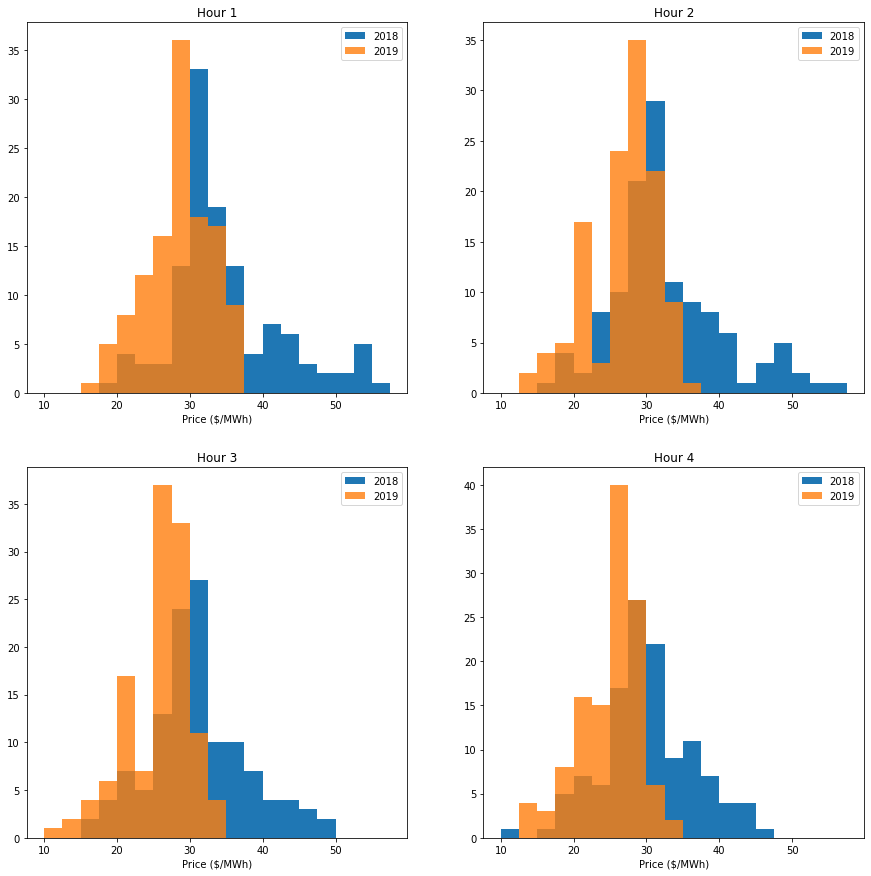

In [89]:
##plotting figures for preliminary analysis
##hours 1-4

fig, axs = plt.subplots(2, 2, figsize = (15,15))
bins_seq1_4 = np.arange(10,60, 2.5)
#[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

axs[0, 0].hist(df_2018_list[0]['DA LMP PGE DLAP'], bins =bins_seq1_4,label = '2018')
axs[0, 0].hist(df_2019_list[0]['DA LMP PGE DLAP'], bins =bins_seq1_4, label = '2019', alpha = 0.8)
#axs[0, 0].legend()
axs[0, 0].set_title('Hour 1')
axs[0, 1].hist(df_2018_list[1]['DA LMP PGE DLAP'], bins =bins_seq1_4,label = '2018')
axs[0, 1].hist(df_2019_list[1]['DA LMP PGE DLAP'], bins =bins_seq1_4, alpha = 0.8, label = '2019')
axs[0, 1].set_title('Hour 2')
axs[1, 0].hist(df_2018_list[2]['DA LMP PGE DLAP'], bins =bins_seq1_4,label = '2018')
axs[1, 0].hist(df_2019_list[2]['DA LMP PGE DLAP'], bins =bins_seq1_4, alpha = 0.8, label = '2019')
axs[1, 0].set_title('Hour 3')
axs[1, 1].hist(df_2018_list[3]['DA LMP PGE DLAP'], bins =bins_seq1_4, label = '2018')
axs[1, 1].hist(df_2019_list[3]['DA LMP PGE DLAP'], bins =bins_seq1_4, alpha = 0.8, label = '2019')
axs[1, 1].set_title('Hour 4')

for ax in axs.flat:
    ax.set(xlabel='Price ($/MWh)', ylabel='')
    ax.legend()

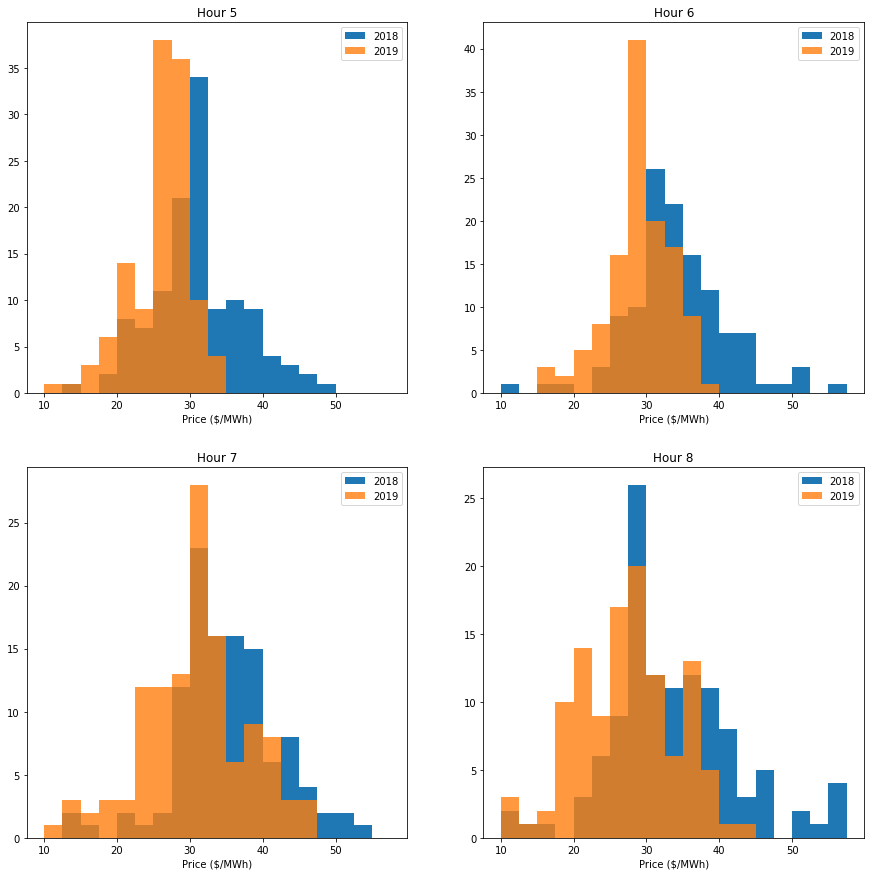

In [91]:
##plotting figures for preliminary analysis
##hours 5-8

fig, axs = plt.subplots(2, 2, figsize = (15,15))
bins_seq1_4 = np.arange(10,60, 2.5)
#[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

axs[0, 0].hist(df_2018_list[4]['DA LMP PGE DLAP'], bins =bins_seq1_4, label = '2018')
axs[0, 0].hist(df_2019_list[4]['DA LMP PGE DLAP'], bins =bins_seq1_4, label = '2019', alpha = 0.8)
axs[0, 0].legend()
axs[0, 0].set_title('Hour 5')
axs[0, 1].hist(df_2018_list[5]['DA LMP PGE DLAP'], bins =bins_seq1_4, label = '2018')
axs[0, 1].hist(df_2019_list[5]['DA LMP PGE DLAP'], bins =bins_seq1_4, alpha = 0.8, label = '2019')
axs[0, 1].set_title('Hour 6')
axs[1, 0].hist(df_2018_list[6]['DA LMP PGE DLAP'], bins =bins_seq1_4, label = '2018')
axs[1, 0].hist(df_2019_list[6]['DA LMP PGE DLAP'], bins =bins_seq1_4, alpha = 0.8, label = '2019')
axs[1, 0].set_title('Hour 7')
axs[1, 1].hist(df_2018_list[7]['DA LMP PGE DLAP'], bins =bins_seq1_4, label = '2018')
axs[1, 1].hist(df_2019_list[7]['DA LMP PGE DLAP'], bins =bins_seq1_4, alpha = 0.8, label = '2019')
axs[1, 1].set_title('Hour 8')

for ax in axs.flat:
    ax.set(xlabel='Price ($/MWh)', ylabel='')
    ax.legend()

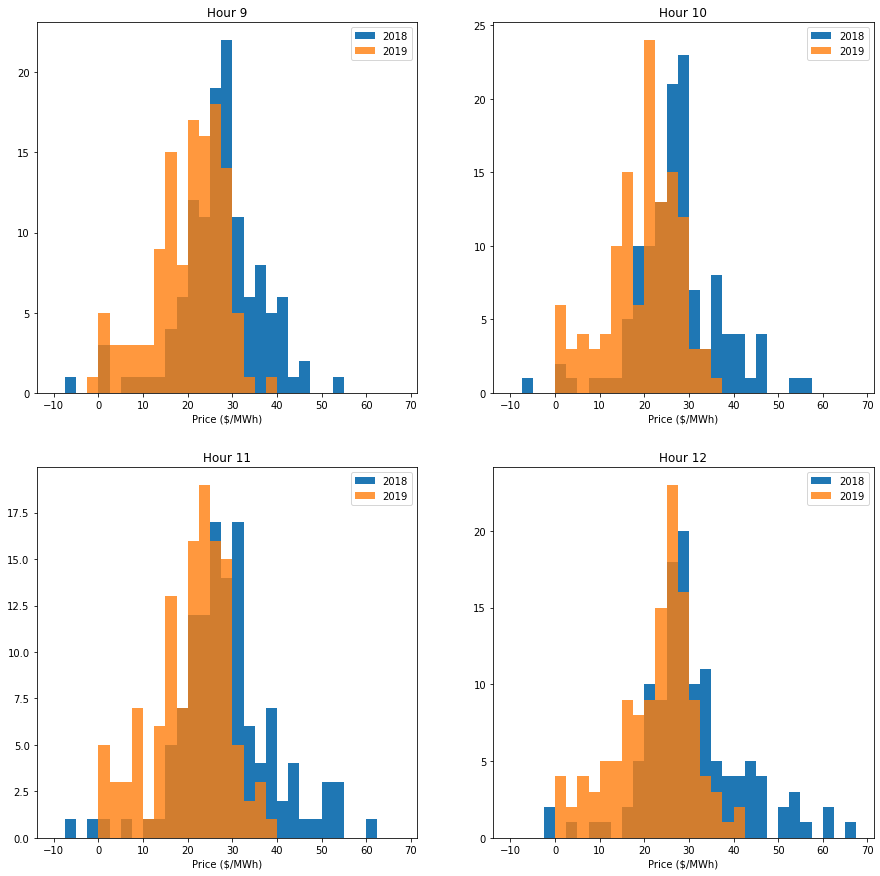

In [95]:
##plotting figures for preliminary analysis
##hours 9-12

fig, axs = plt.subplots(2, 2, figsize = (15,15))
bins_seq1_4 = np.arange(-10,70, 2.5)
#[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

axs[0, 0].hist(df_2018_list[8]['DA LMP PGE DLAP'], bins =bins_seq1_4, label = '2018')
axs[0, 0].hist(df_2019_list[8]['DA LMP PGE DLAP'], bins =bins_seq1_4, label = '2019', alpha = 0.8)
axs[0, 0].legend()
axs[0, 0].set_title('Hour 9')
axs[0, 1].hist(df_2018_list[9]['DA LMP PGE DLAP'], bins =bins_seq1_4, label = '2018')
axs[0, 1].hist(df_2019_list[9]['DA LMP PGE DLAP'], bins =bins_seq1_4, alpha = 0.8, label = '2019')
axs[0, 1].set_title('Hour 10')
axs[1, 0].hist(df_2018_list[10]['DA LMP PGE DLAP'], bins =bins_seq1_4, label = '2018')
axs[1, 0].hist(df_2019_list[10]['DA LMP PGE DLAP'], bins =bins_seq1_4, alpha = 0.8, label = '2019')
axs[1, 0].set_title('Hour 11')
axs[1, 1].hist(df_2018_list[11]['DA LMP PGE DLAP'], bins =bins_seq1_4, label = '2018')
axs[1, 1].hist(df_2019_list[11]['DA LMP PGE DLAP'], bins =bins_seq1_4, alpha = 0.8, label = '2019')
axs[1, 1].set_title('Hour 12')

for ax in axs.flat:
    ax.set(xlabel='Price ($/MWh)', ylabel='')
    ax.legend()

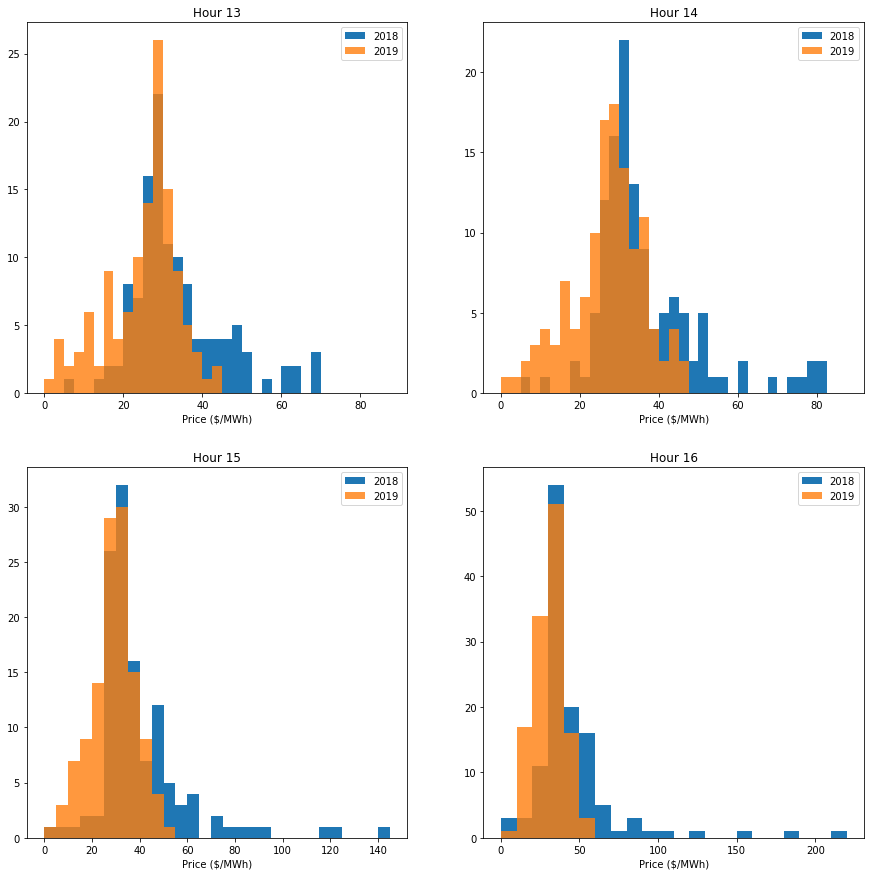

In [97]:
##plotting figures for preliminary analysis
##hours 12-15

fig, axs = plt.subplots(2, 2, figsize = (15,15))
bins_seq1_4 = np.arange(0,90, 2.5)
#[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

axs[0, 0].hist(df_2018_list[12]['DA LMP PGE DLAP'], bins =bins_seq1_4, label = '2018')
axs[0, 0].hist(df_2019_list[12]['DA LMP PGE DLAP'], bins =bins_seq1_4, label = '2019', alpha = 0.8)
axs[0, 0].legend()
axs[0, 0].set_title('Hour 13')
axs[0, 1].hist(df_2018_list[13]['DA LMP PGE DLAP'], bins =bins_seq1_4, label = '2018')
axs[0, 1].hist(df_2019_list[13]['DA LMP PGE DLAP'], bins =bins_seq1_4, alpha = 0.8, label = '2019')
axs[0, 1].set_title('Hour 14')
axs[1, 0].hist(df_2018_list[14]['DA LMP PGE DLAP'], bins =np.arange(0,150, 5), label = '2018')
axs[1, 0].hist(df_2019_list[14]['DA LMP PGE DLAP'], bins =np.arange(0,150, 5), alpha = 0.8, label = '2019')
axs[1, 0].set_title('Hour 15')
axs[1, 1].hist(df_2018_list[15]['DA LMP PGE DLAP'], bins =np.arange(0,230, 10), label = '2018')
axs[1, 1].hist(df_2019_list[15]['DA LMP PGE DLAP'], bins =np.arange(0,230, 10), alpha = 0.8, label = '2019')
axs[1, 1].set_title('Hour 16')

for ax in axs.flat:
    ax.set(xlabel='Price ($/MWh)', ylabel='')
    ax.legend()

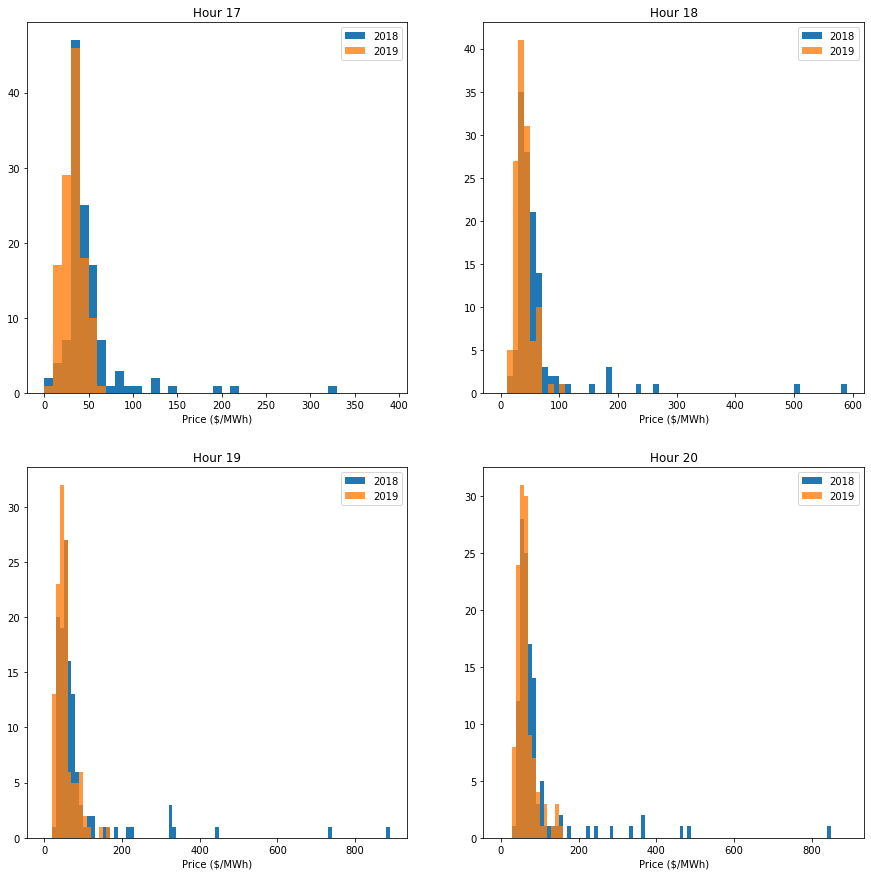

In [100]:
##plotting figures for preliminary analysis
##hours 17-20

fig, axs = plt.subplots(2, 2, figsize = (15,15))
bins_seq1_4 = 30
#np.arange(-10,70, 2.5)
#[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

axs[0, 0].hist(df_2018_list[16]['DA LMP PGE DLAP'], bins =np.arange(0,400, 10), label = '2018')
axs[0, 0].hist(df_2019_list[16]['DA LMP PGE DLAP'], bins =np.arange(0,400, 10), label = '2019', alpha = 0.8)
axs[0, 0].legend()
axs[0, 0].set_title('Hour 17')
axs[0, 1].hist(df_2018_list[17]['DA LMP PGE DLAP'], bins =np.arange(0,600, 10), label = '2018')
axs[0, 1].hist(df_2019_list[17]['DA LMP PGE DLAP'], bins =np.arange(0,600, 10), alpha = 0.8, label = '2019')
axs[0, 1].set_title('Hour 18')
axs[1, 0].hist(df_2018_list[18]['DA LMP PGE DLAP'], bins =np.arange(0,900, 10), label = '2018')
axs[1, 0].hist(df_2019_list[18]['DA LMP PGE DLAP'], bins =np.arange(0,900, 10), alpha = 0.8, label = '2019')
axs[1, 0].set_title('Hour 19')
axs[1, 1].hist(df_2018_list[19]['DA LMP PGE DLAP'], bins =np.arange(0,900, 10), label = '2018')
axs[1, 1].hist(df_2019_list[19]['DA LMP PGE DLAP'], bins =np.arange(0,900, 10), alpha = 0.8, label = '2019')
axs[1, 1].set_title('Hour 20')

for ax in axs.flat:
    ax.set(xlabel='Price ($/MWh)', ylabel='')
    ax.legend()

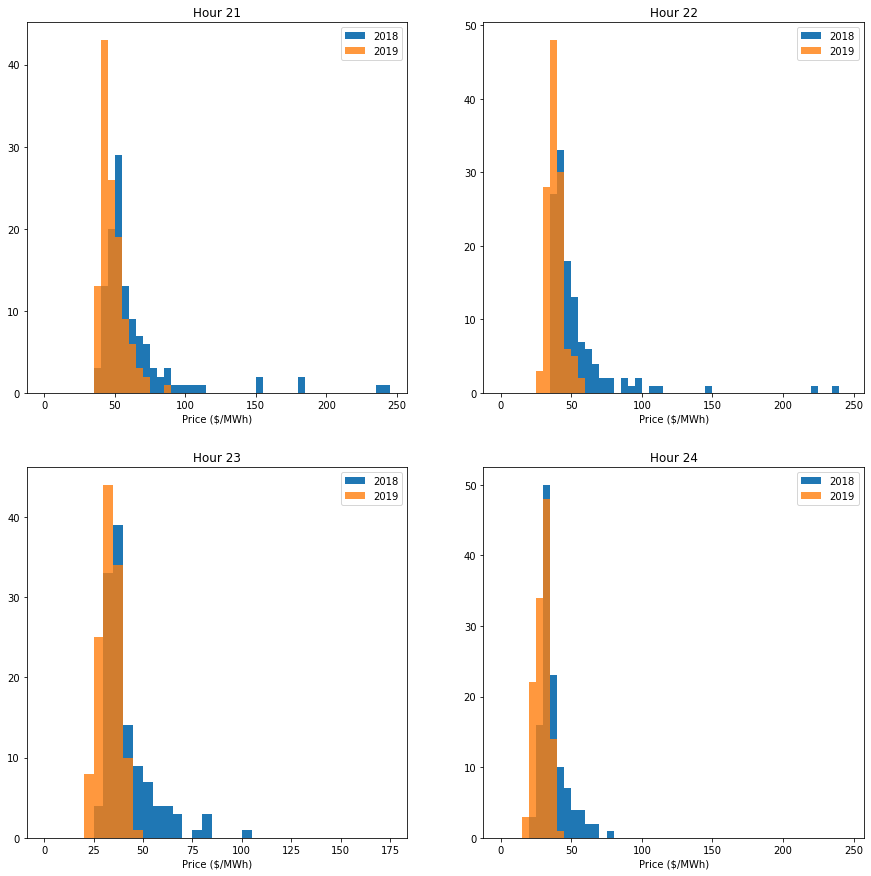

In [105]:
##plotting figures for preliminary analysis
##hours 21-24

fig, axs = plt.subplots(2, 2, figsize = (15,15))
bins_seq1_4 = 30
#np.arange(-10,70, 2.5)
#[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

axs[0, 0].hist(df_2018_list[20]['DA LMP PGE DLAP'], bins =np.arange(0,250, 5), label = '2018')
axs[0, 0].hist(df_2019_list[20]['DA LMP PGE DLAP'], bins =np.arange(0,250, 5), label = '2019', alpha = 0.8)
axs[0, 0].legend()
axs[0, 0].set_title('Hour 21')
axs[0, 1].hist(df_2018_list[21]['DA LMP PGE DLAP'], bins =np.arange(0,250, 5), label = '2018')
axs[0, 1].hist(df_2019_list[21]['DA LMP PGE DLAP'], bins =np.arange(0,250, 5), alpha = 0.8, label = '2019')
axs[0, 1].set_title('Hour 22')
axs[1, 0].hist(df_2018_list[22]['DA LMP PGE DLAP'], bins =np.arange(0,180, 5), label = '2018')
axs[1, 0].hist(df_2019_list[22]['DA LMP PGE DLAP'], bins =np.arange(0,180, 5), alpha = 0.8, label = '2019')
axs[1, 0].set_title('Hour 23')
axs[1, 1].hist(df_2018_list[23]['DA LMP PGE DLAP'], bins =np.arange(0,250, 5), label = '2018')
axs[1, 1].hist(df_2019_list[23]['DA LMP PGE DLAP'], bins =np.arange(0,250, 5), alpha = 0.8, label = '2019')
axs[1, 1].set_title('Hour 24')

for ax in axs.flat:
    ax.set(xlabel='Price ($/MWh)', ylabel='')
    ax.legend()

In [579]:
### New arrays of LMPs and Load forecasts of just hour 6 pm (18) for 2018 and 2019

###2018###
df_2018_6pm = df_2018[df_2018['OPR_HR'] == 18]
array_2018_6pm_lmp = df_2018_6pm['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1)
array_2018_6pm_load = df_2018_6pm['7DA Load Forecast'].to_numpy().reshape(-1, 1)


###2019###
df_2019_6pm = df_2019[df_2019['OPR_HR'] == 18]
array_2019_6pm_lmp = df_2019_6pm['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1)
array_2019_6pm_load = df_2019_6pm['7DA Load Forecast'].to_numpy().reshape(-1, 1)





In [576]:
##reformatting same as above but for testing other parameters

array_2019_6pm_lmp_simple = df_2019_6pm['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1)
array_2019_6pm_load_simple = df_2019_6pm['7DA Load Forecast'].to_numpy().reshape(-1, 1)


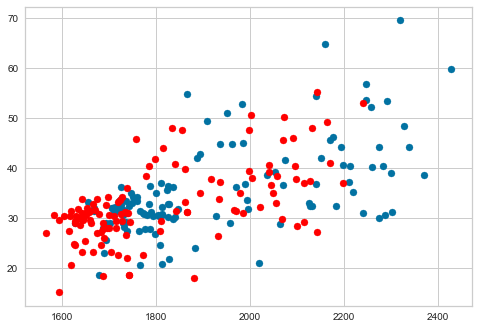

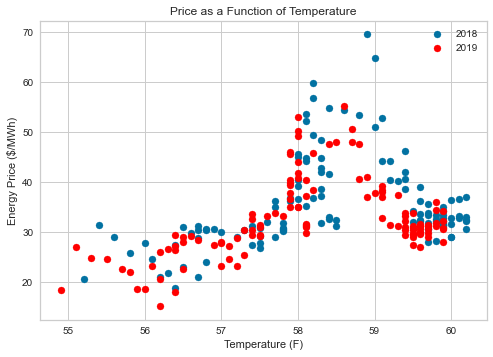

In [666]:
##preliminary plitting to evaluate daily temperature and hourly prices

plt.scatter(df_2018_list[0]['7DA Load Forecast'].to_numpy().reshape(-1, 1),
         (df_2018_list[0]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1) ))

plt.scatter(df_2018_list[1]['7DA Load Forecast'].to_numpy().reshape(-1, 1),
         (df_2018_list[1]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1) ), color = 'red')

plt.show()
plt.scatter(df_2018_list[0]['SF Temp (F)'].to_numpy().reshape(-1, 1),
         (df_2018_list[0]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1) ), label = '2018')

plt.scatter(df_2018_list[1]['SF Temp (F)'].to_numpy().reshape(-1, 1),
         (df_2018_list[1]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1) ), color = 'red', label = '2019')
plt.title('Price as a Function of Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Energy Price ($/MWh)')
plt.legend()
plt.show()

(array([ 3.,  3.,  7.,  9., 10., 11., 25.,  7., 11., 36.]),
 array([54.9, 55.4, 55.9, 56.4, 56.9, 57.4, 57.9, 58.4, 58.9, 59.4, 59.9]),
 <BarContainer object of 10 artists>)

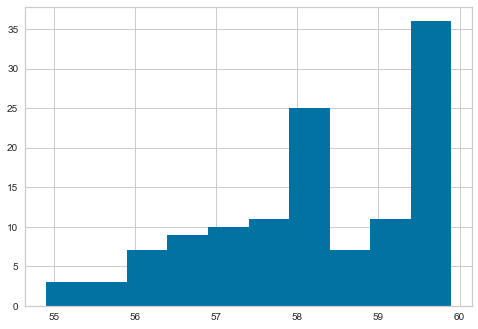

In [374]:
##histogram of 2018 hourly temperatures

plt.hist(df_2018_list[1]['SF Temp (F)'].to_numpy().reshape(-1, 1))

Coefficients: 
 [[0.07923503]]
Mean squared error: 967.44
Coefficient of determination: -3.76


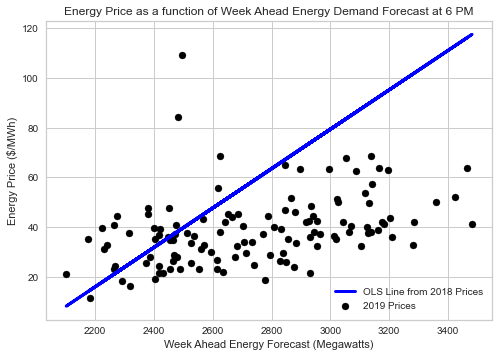

In [580]:
##fitting a basic linear regression with energy prices as the response and week ahead energy demand as the predictor

basic_model = LinearRegression(fit_intercept=True)
basic_model.fit(array_2018_6pm_load, array_2018_6pm_lmp)
r_sq = basic_model.score(array_2018_6pm_load, array_2018_6pm_lmp)

lmp_pred_2019_6pm = basic_model.predict(array_2019_6pm_load)
lmp_pred_2018_6pm = basic_model.predict(array_2018_6pm_load)


# The coefficients
print('Coefficients: \n', basic_model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(array_2019_6pm_lmp, lmp_pred_2019_6pm))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(array_2019_6pm_lmp, lmp_pred_2019_6pm))

# Plot outputs
plt.scatter(array_2019_6pm_load, array_2019_6pm_lmp,  color='black', label = '2019 Prices')

plt.plot(array_2019_6pm_load, lmp_pred_2019_6pm, color='blue', linewidth=3, label = 'OLS Line from 2018 Prices')


plt.legend()

plt.xlabel('Week Ahead Energy Forecast (Megawatts)')
plt.ylabel('Energy Price ($/MWh)')
plt.title('Energy Price as a function of Week Ahead Energy Demand Forecast at 6 PM')
plt.show()

Text(0, 0.5, 'Residual ($/MWh)')

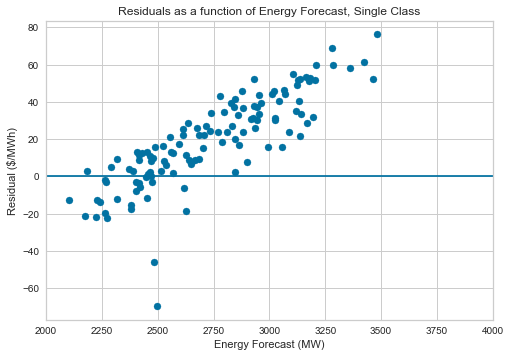

In [587]:
##plotting residuals of above function

errors_simple = lmp_pred_2019_6pm - array_2019_6pm_lmp
plt.scatter(array_2019_6pm_load,errors_simple)
plt.hlines(y = 0, xmin = 2000, xmax = 4000)
plt.xlim(2000,4000),
plt.title('Residuals as a function of Energy Forecast, Single Class')
plt.xlabel('Energy Forecast (MW)')
plt.ylabel('Residual ($/MWh)')

Text(0.5, 0, 'Price Residuals ($/MWh)')

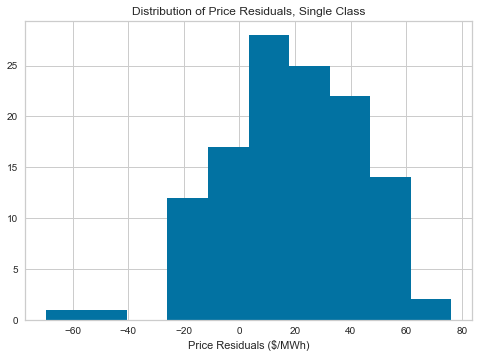

In [588]:
#plotting a histogram of those errors

plt.hist(errors_simple)
plt.title('Distribution of Price Residuals, Single Class')
plt.xlabel('Price Residuals ($/MWh)')

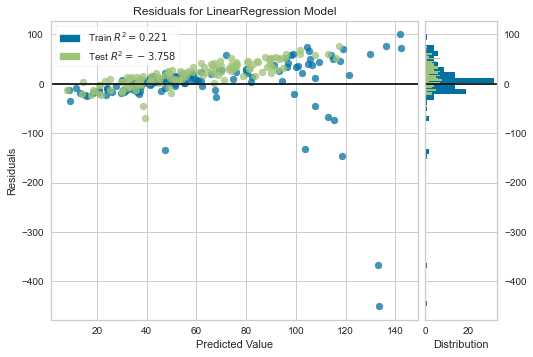

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [263]:
#another version of the visualization above (errors)

import yellowbrick
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(basic_model)

visualizer.fit(array_2018_6pm_load, array_2018_6pm_lmp)  # Fit the training data to the visualizer
visualizer.score(array_2019_6pm_load, array_2019_6pm_lmp)  # Evaluate the model on the test data
visualizer.show()

In [ ]:
## a second linear regression basic model

basic_model_2 = LinearRegression(fit_intercept=True)
basic_model.fit(array_2018_6pm_load, array_2018_6pm_lmp)
r_sq = basic_model.score(array_2018_6pm_load, array_2018_6pm_lmp)

lmp_pred_2019_6pm = basic_model.predict(array_2019_6pm_load)
lmp_pred_2018_6pm = basic_model.predict(array_2018_6pm_load)


# The coefficients
print('Coefficients: \n', basic_model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(array_2019_6pm_lmp, lmp_pred_2019_6pm))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(array_2019_6pm_lmp, lmp_pred_2019_6pm))

# Plot outputs
plt.scatter(array_2019_6pm_load, array_2019_6pm_lmp,  color='black', label = '2019 Prices')

plt.plot(array_2019_6pm_load, lmp_pred_2019_6pm, color='blue', linewidth=3, label = 'OLS Line from 2018 Prices')


plt.legend()

plt.xlabel('Week Ahead Energy Forecast (Megawatts)')
plt.ylabel('Energy Price ($/MWh)')
plt.title('Energy Price as a function of Week Ahead Energy Demand Forecast at 6 PM')
plt.show()

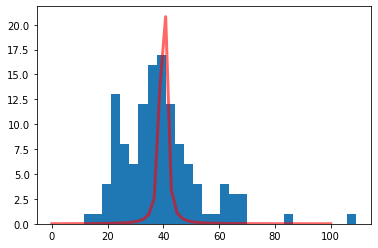

In [43]:
## a histogram of these errors along with a t distribution overlayed

plt.hist(array_2019_6pm_lmp, bins  =30)
x = np.linspace(0,100)
df = 1.32
sig_stud = 9.21
plt.plot(x, 100*t.pdf(x, df=df, loc = 40, scale =1),
       'r-', lw=3, alpha=0.6, label='t pdf')
plt.show()

Bayesian Linear Regression with stated distribution that the prices are distributed 

$LMP$ ~ N$(w^{T}x, \sigma ^2 I)$

And since we don't know much about the parameters, we will specify a gaussian prior on the mean and the covariance.

In [178]:
##  Using metropolios hastings to converge to the parameters used in the basic linear regressions
##This version ultimately did not work and converge
#THIS IS THE HOUR 1 TWO DIM MODEL 2018


N_SAMPLES = 5000
with pm.Model() as price_model_gauss_h1:
   
    #betas = pm.Normal('betas', mu=0.0, sd = 100, shape =2)
    slope = pm.Normal('slope', mu=0.0, sd = 10)
    
    intercept = pm.Normal('intercept', mu=0.0, sd = 100)
    #pred = pm.Data("pred", predictors)
    sigma = pm.Uniform('sigma', lower =0, upper =100)
    slope_2 = pm.Normal('slope_2', mu=0.0, sd = 100)
    # Estimate of mean
    mean = intercept + slope*df_2018_list[0]['7DA Load Forecast'].to_numpy().reshape(-1, 1) + (slope_2**2)*df_2018_list[0]['SF Temp (F)'].to_numpy().reshape(-1, 1)
    
    #mean = intercept + slope*df_2018_list[0]['7DA Load Forecast'].to_numpy().reshape(-1, 1)
    
    lmp_obs = pm.Normal('lmp_obs', mu = mean, sd = sigma, 
                        observed =df_2018_list[0]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1))
  
    #step = pm.HamiltonianMC()
    step = pm.Metropolis()
    
    # Sample from the posterior using the sampling method
    price_trace_gauss_h1 = pm.sample(N_SAMPLES, step=step);
    
az.summary(price_trace_gauss_h1, var_names=["intercept", "slope","slope_2", "sigma"], round_to=4)    

<ipython-input-178-6b4782b2ce3f>:30: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  price_trace_gauss_h1 = pm.sample(N_SAMPLES, step=step);
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [slope_2]
>Metropolis: [sigma]
>Metropolis: [intercept]
>Metropolis: [slope]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 218 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
/Users/ericgarc/miniconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


KeyError: 'var names: "[\'slope_2sigma\'] are not present" in dataset'

In [179]:
##summary of the output of the metropolis hastings algorithm

az.summary(price_trace_gauss_h1, var_names=["intercept", "slope","slope_2", "sigma"], round_to=4)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,-59.4622,15.1270,-87.7741,-34.8900,6.2791,4.6845,6.2290,30.2879,1.7133
slope,0.0236,0.0032,0.0186,0.0297,0.0011,0.0009,7.6948,18.2351,1.4834
slope_2,0.0097,0.9208,-1.0587,1.1352,0.4586,0.3512,4.5990,11.5165,2.8736
sigma,6.9674,0.4543,6.1123,7.8190,0.0251,0.0178,308.4665,2242.0110,1.0212


In [165]:
#df_2018_list[0]['7DA Load Forecast'].to_numpy().reshape(-1, 1)
#df_2018_list[0]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1)
#df_2018_list[0]['SF Temp (F)'].to_numpy().reshape(-1, 1)

#THIS IS THE HOUR 2 TWO DIM MODEL 2018


N_SAMPLES = 5000
with pm.Model() as price_model_gauss_h2:
   
    betas = pm.Normal('betas', mu=0.0, sd = 10, shape =3)
    #slope = pm.Normal('slope', mu=0.0, sd = 10)
    
    #intercept = pm.Normal('intercept', mu=0.0, sd = 10)
    #pred = pm.Data("pred", predictors)
    sigma = pm.Uniform('sigma', lower =0, upper = 100)
    
    # Estimate of mean
    mean = betas[0] + betas[1]*df_2018_list[1]['7DA Load Forecast'].to_numpy().reshape(-1, 1) + betas[2]*df_2018_list[1]['SF Temp (F)'].to_numpy().reshape(-1, 1)
    
    lmp_obs = pm.Normal('lmp_obs', mu = mean, sd = sigma, 
                        observed =df_2018_list[1]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1))
  
    #step = pm.HamiltonianMC()
    step = pm.Metropolis()
    
    # Sample from the posterior using the sampling method
    price_trace_gauss_h2 = pm.sample(N_SAMPLES, step=step);
az.summary(price_trace_gauss_h2, var_names=["betas", "sigma"], round_to=4)   

<ipython-input-165-d27b90ba25c2>:28: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  price_trace_gauss_h2 = pm.sample(N_SAMPLES, step=step);
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sigma]
>Metropolis: [betas]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 110 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
/Users/ericgarc/miniconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],1.2846,0.9512,-0.0552,2.7000,0.4751,0.3640,4.3145,11.9226,3.8159
betas[1],0.0286,0.0144,0.0145,0.0533,0.0072,0.0055,4.5497,22.9155,2.9854
betas[2],-0.3506,0.4485,-1.1090,0.0737,0.2238,0.1715,4.6834,20.9040,2.6964
sigma,6.8898,1.0591,5.5087,9.0016,0.4816,0.3650,7.1360,29.9836,1.5411


In [163]:
az.summary(price_trace_gauss_h2, var_names=["betas", "sigma"], round_to=4)

/Users/ericgarc/miniconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],0.4816,0.9930,-1.0474,1.4936,0.4945,0.3786,4.4697,18.3241,3.3568
betas[1],0.0126,0.0083,0.0056,0.0272,0.0041,0.0032,4.6868,17.6542,2.7390
betas[2],0.1672,0.2466,-0.2725,0.3597,0.1227,0.0939,4.4486,11.7962,3.3475
sigma,6.6234,0.4649,5.8040,7.5442,0.0982,0.0704,21.5080,136.5837,1.1321


In [161]:
"""This is the loop for 2018"""
#an attempt at looping through the metropolis hastings for the 24 hoursl
### The 2018 model that samples the coefficients from all 24 hours###
for i in range(1):
    print(f"we are on hour {i}")
    price_traces_2018 = []
    N_SAMPLES = 5000
    with pm.Model() as price_model_gauss_2018:

        slope = pm.Normal('slope', mu=0.0, sd = 10)

        intercept = pm.Normal('intercept', mu=0.0, sd = 10)
        #pred = pm.Data("pred", predictors)
        sigma = pm.Uniform('sigma', lower =0, upper = 100)
        #slope_2 = pm.Normal('slope_2', mu=0.0, sd = 10)
        # Estimate of mean
        mean = intercept + slope*df_2018_list[i]['7DA Load Forecast'].to_numpy().reshape(-1, 1)
        #+slope_2*df_2018_list[i]['SF Temp (F)'].to_numpy().reshape(-1, 1)

        lmp_obs = pm.Normal('lmp_obs', mu = mean, sd = sigma, observed = df_2018_list[i]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1))

        #step = pm.HamiltonianMC()
        step = pm.Metropolis()

        # Sample from the posterior using the sampling method
        price_trace_gauss_2018 = pm.sample(N_SAMPLES, step=step);
    price_traces_2018.append(price_trace_gauss_2018)
az.summary(price_trace_gauss_TEST, var_names=["slope","intercept", "sigma"], round_to=4)    
"""This is the loop"""



we are on hour 0


<ipython-input-161-3455180901fe>:26: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  price_trace_gauss_2018 = pm.sample(N_SAMPLES, step=step);
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sigma]
>Metropolis: [intercept]
>Metropolis: [slope]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 141 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/Users/ericgarc/miniconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


'This is the loop'

In [653]:
#THIS IS THE  6 PM 2 DIM MODEL WITH OTHER METHOD 

"""THIS WORKS"""

N_SAMPLES = 10000
with pm.Model() as price_model_gauss_2dim:
   
    slope = pm.Normal('slope', mu=0.0, sd = 1)
    
    intercept = pm.Normal('intercept', mu=0.0, sd = 0.5)
    #pred = pm.Data("pred", predictors)
    sigma = pm.Uniform('sigma', lower =0, upper = 100)
    slope_2 = pm.SkewNormal('slope_2', mu=0.0, sigma = 0.1, alpha = -1)
    # Estimate of mean
    mean = intercept + slope*df_2018_list[18]['7DA Load Forecast'].to_numpy().reshape(-1, 1)+(slope_2)*(df_2018_list[18]['SF Temp (F)'].to_numpy().reshape(-1, 1)**2)
    
    lmp_obs = pm.Normal('lmp_obs', mu = mean, sd = sigma, observed = df_2018_list[18]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1))
  
    #step = pm.HamiltonianMC()
    step = pm.Metropolis()
    
    # Sample from the posterior using the sampling method
    price_trace_gauss_2dim = pm.sample(N_SAMPLES, step=step);
    
  
"""THIS WORKS"""

/Users/ericgarc/miniconda3/lib/python3.8/site-packages/theano/scalar/basic.py:2893: RuntimeWarning: invalid value encountered in log
  return np.log(x)
<ipython-input-653-27b7a65dde15>:23: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  price_trace_gauss_2dim = pm.sample(N_SAMPLES, step=step);
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [slope_2]
>Metropolis: [sigma]
>Metropolis: [intercept]
>Metropolis: [slope]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 467 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


'THIS WORKS'

In [656]:
#Calculating correlation  for the coefficients
from numpy import cov
slope_samples_2dim = price_trace_gauss_2dim["slope"][20000:, None]
slope2_samples_2dim = price_trace_gauss_2dim["slope_2"][20000:, None]

cov_coeff = cov(slope_samples_2dim[:,0] , slope2_samples_2dim[:,0])
#np.shape(slope2_samples_2dim[:,0])                                             
cov_coeff

array([[ 0.00038989, -0.00026291],
       [-0.00026291,  0.00018178]])

In [624]:
np.shape(slope2_samples_2dim)

(60000, 1)

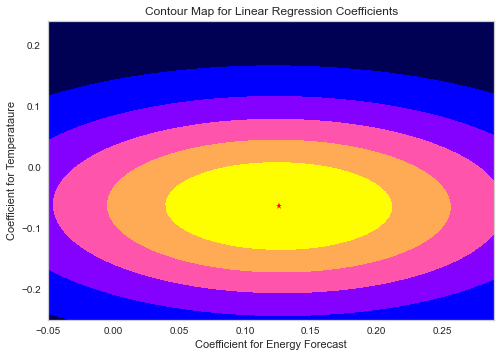

In [659]:
mycmap = plt.get_cmap('gnuplot2')
### MAKING THE CONTOUR PLOT OF THE ABOVE TWO DIM REGRESSION
from scipy.stats import multivariate_normal
from scipy.stats import norm
from scipy.stats import pearsonr
x, y = np.mgrid[-.05:0.3:.01, -0.25:0.25:.01]
pos = np.dstack((x, y))

slope_mean = summary_2dim['mean'][0]
slope2_mean = summary_2dim['mean'][1]

slope_sd = summary_2dim['sd'][0]
slope2_sd = summary_2dim['sd'][1]


cov = [[slope_sd,cov_coeff[0,1]],[cov_coeff[1,0],slope2_sd]]

rvs = multivariate_normal( [slope_mean, slope2_mean], cov)
plt.plot(slope_mean, slope2_mean, "*", color ='red')
plt.xlabel('Coefficient for Energy Forecast')
plt.ylabel('Coefficient for Temperataure')
plt.title('Contour Map for Linear Regression Coefficients')
plt.contourf(x, y, rvs.pdf(pos), cmap=mycmap)

In [ ]:
### GLM WITH MULTIVARIATES

In [654]:
summary_2dim = az.summary(price_trace_gauss_2dim, var_names=["slope","slope_2","intercept", "sigma"], round_to=4)  

/Users/ericgarc/miniconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [655]:
summary_2dim

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
slope,0.1258,0.0216,0.0836,0.1652,0.0030,0.0021,53.6532,49.2422,1.0612
slope_2,-0.0636,0.0148,-0.0894,-0.0338,0.0020,0.0014,53.5807,47.8071,1.0631
intercept,-0.0006,0.4986,-0.9103,0.9455,0.0054,0.0039,8448.3448,9830.9746,1.0008
sigma,96.4373,2.7986,91.2904,99.9998,0.0310,0.0220,6486.3655,5796.4996,1.0005


In [215]:
"""DO NOT MESS WITH THIS"""


#THIS IS THE  6 PM 1 DIM MODEL

N_SAMPLES = 10000
with pm.Model() as price_model_gauss:
   
    slope = pm.Normal('slope', mu=0.0, sd = 10)
    
    intercept = pm.Normal('intercept', mu=0.0, sd = 10)
    #pred = pm.Data("pred", predictors)
    sigma = pm.Uniform('sigma', lower =0, upper = 100)
    
    # Estimate of mean
    mean = intercept + slope*array_2018_6pm_load
    
    lmp_obs = pm.Normal('lmp_obs', mu = mean, sd = sigma, observed = array_2018_6pm_lmp)
  
    #step = pm.HamiltonianMC()
    step = pm.Metropolis()
    
    # Sample from the posterior using the sampling method
    price_trace_gauss = pm.sample(N_SAMPLES, step=step);
    
az.summary(price_model_gauss, var_names=["slope","intercept", "sigma"], round_to=4)    
"""DO NOT MESS WITH THIS"""

/Users/ericgarc/miniconda3/lib/python3.8/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
/Users/ericgarc/miniconda3/lib/python3.8/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
<ipython-input-215-a00e55d67601>:24: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  price_trace_gauss = pm.sample(N_SAMPLES, step=step);
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, intercept, slope]


ValueError: Not enough samples to build a trace.

In [199]:
prices_summary = az.summary(price_trace_gauss, var_names=["slope","intercept", "sigma"], round_to=4)

<ipython-input-665-bba410f6f705>:1: DeprecationWarning: The function `autocorrplot` from PyMC3 is just an alias for `plot_autocorr` from ArviZ. Please switch to `pymc3.plot_autocorr` or `arviz.plot_autocorr`.
  pm.autocorrplot(price_trace_gauss, ["slope","intercept", "sigma"])
/Users/ericgarc/miniconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'slope\n0'}>,
        <AxesSubplot:title={'center':'slope\n1'}>,
        <AxesSubplot:title={'center':'slope\n2'}>],
       [<AxesSubplot:title={'center':'slope\n3'}>,
        <AxesSubplot:title={'center':'intercept\n0'}>,
        <AxesSubplot:title={'center':'intercept\n1'}>],
       [<AxesSubplot:title={'center':'intercept\n2'}>,
        <AxesSubplot:title={'center':'intercept\n3'}>,
        <AxesSubplot:title={'center':'sigma\n0'}>],
       [<AxesSubplot:title={'center':'sigma\n1'}>,
        <AxesSubplot:title={'center':'sigma\n2'}>,
        <AxesSubplot:title={'center':'sigma\n3'}>]], dtype=object)

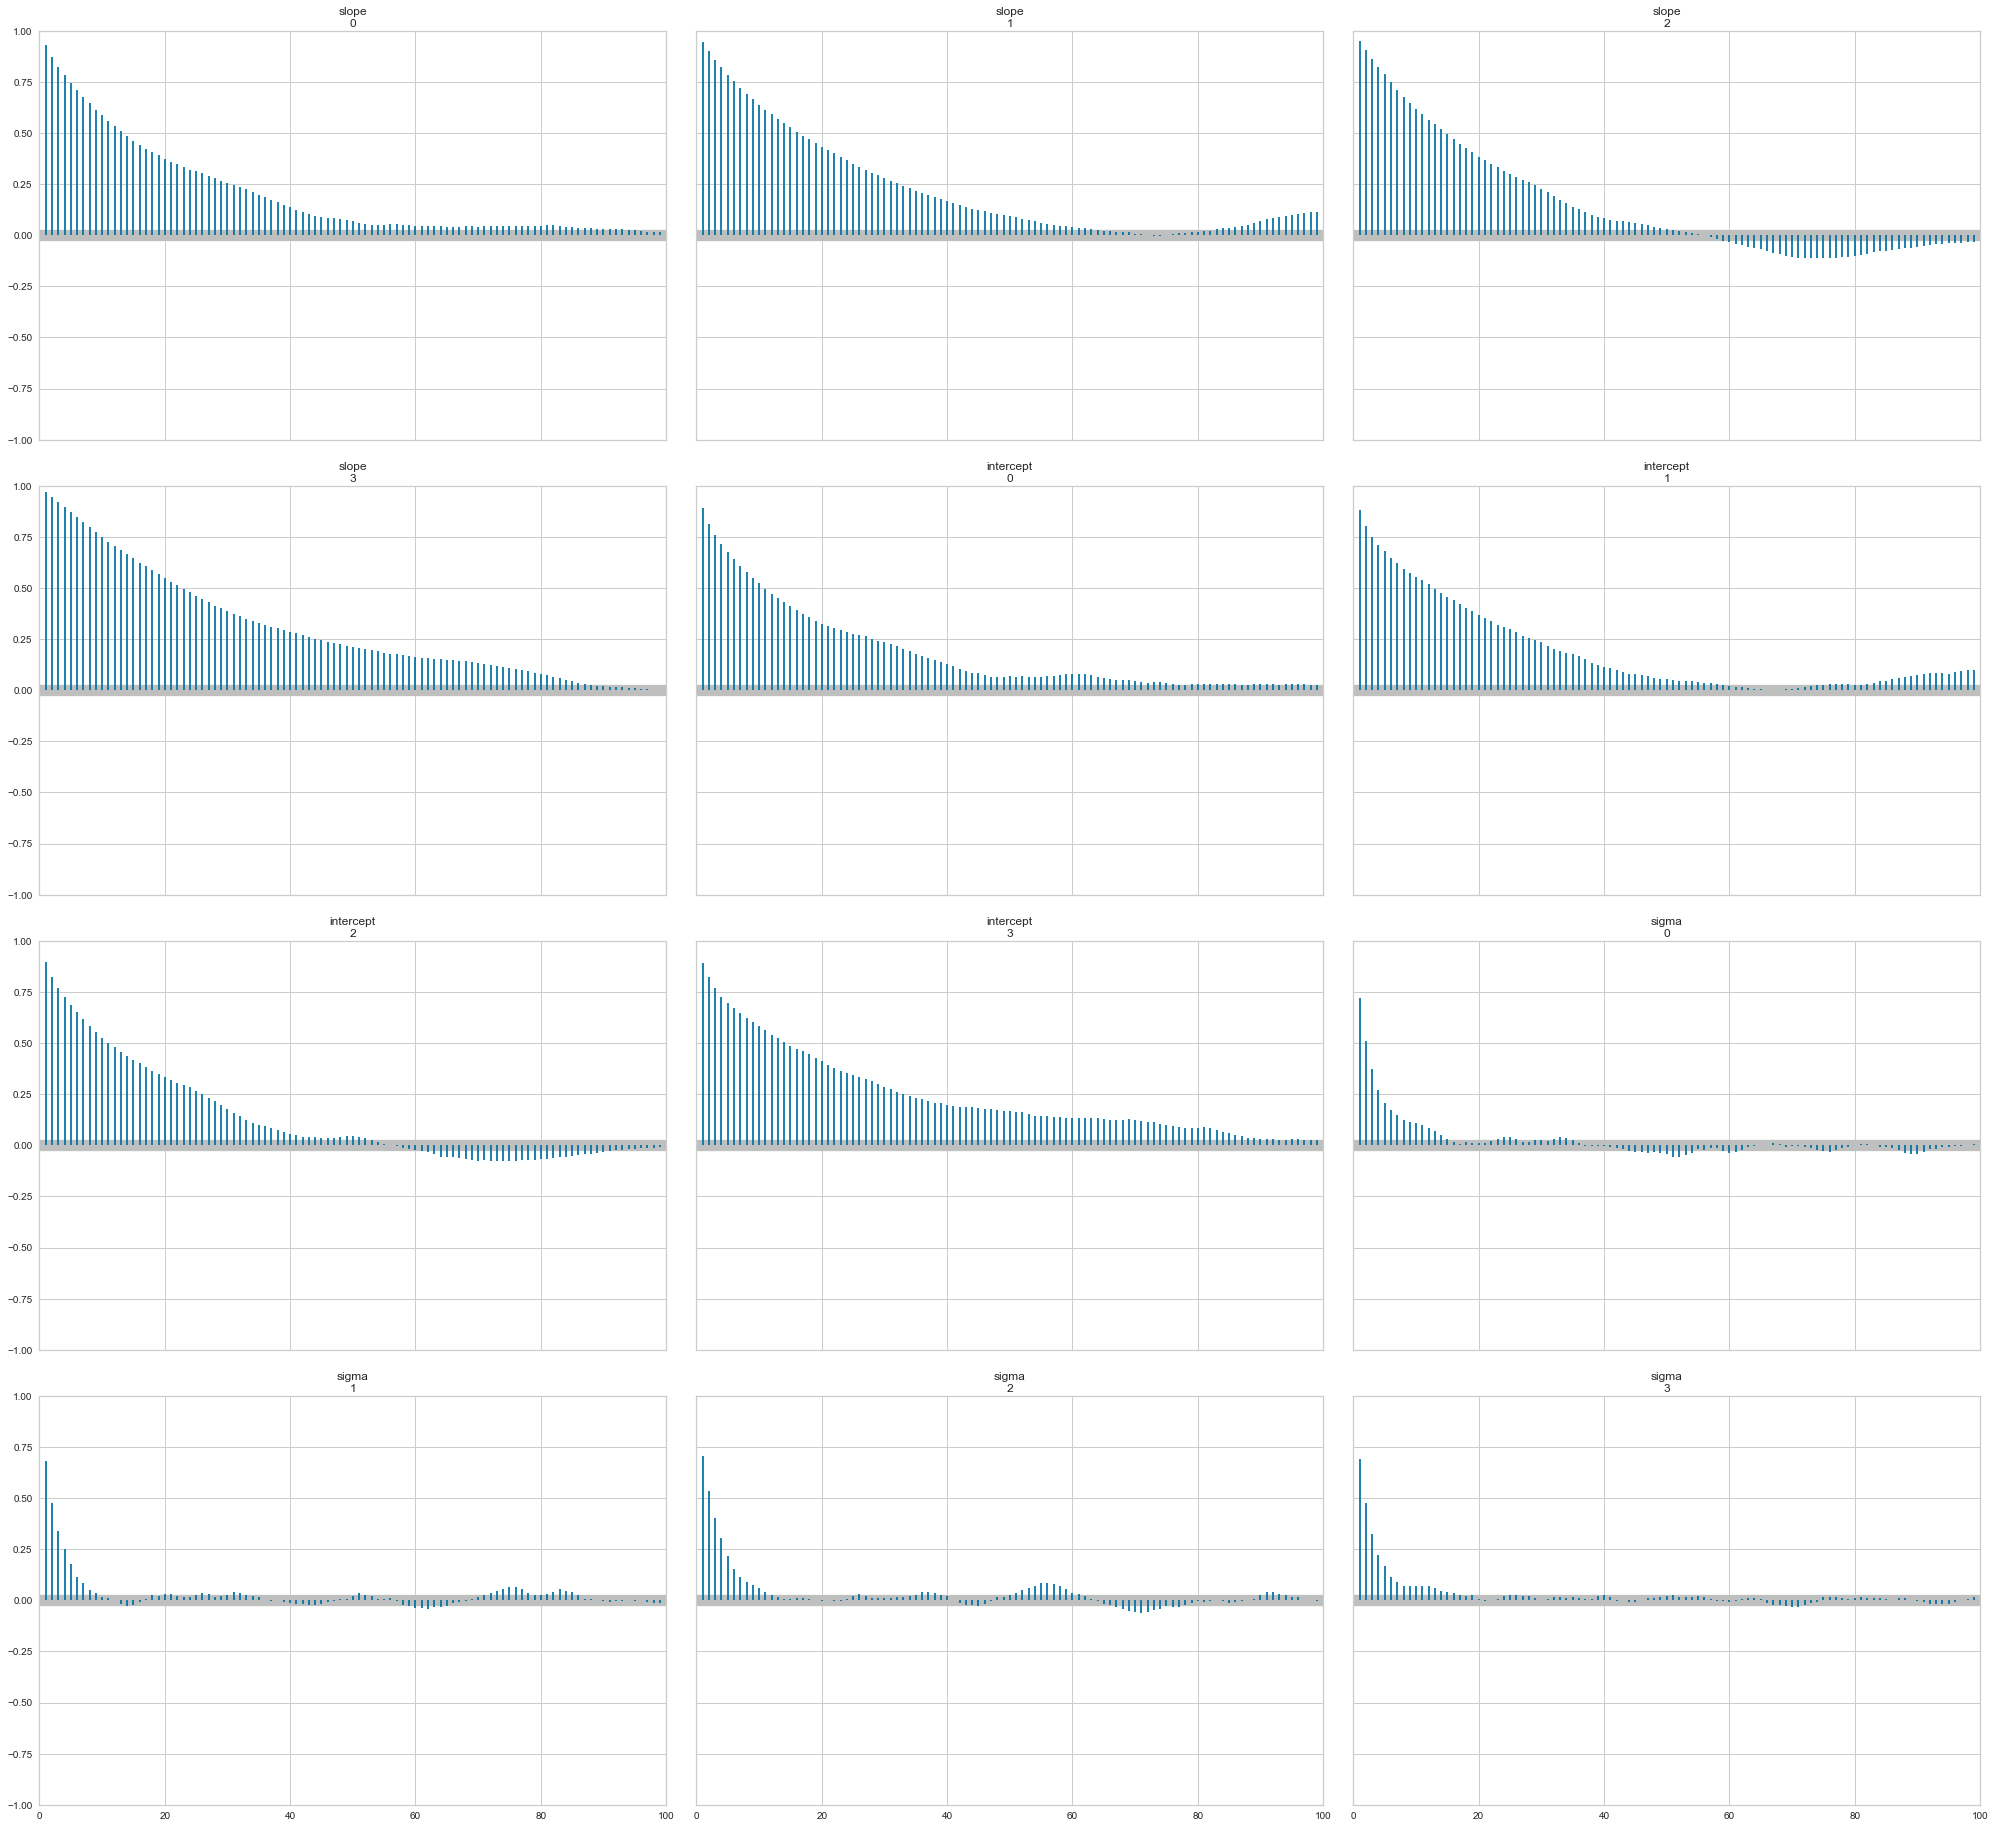

In [665]:
pm.autocorrplot(price_trace_gauss, ["slope","intercept", "sigma"])

In [218]:
#THIS IS THE  2018 MODEL FOR HOURS 1 AND 2

N_SAMPLES = 10000
with pm.Model() as price_model_gauss_test2:
    
    ####HOUR 1######
    
    
    slope_1 = pm.Normal('slope_1', mu=0.0, sd = 10)

    intercept_1 = pm.Normal('intercept_1', mu=0.0, sd = 10)
        
    sigma_1 = pm.Uniform('sigma_1', lower =0, upper = 100)

    # Estimate of mean
    mean_1 = intercept_1 + slope_1*df_2018_list[0]['7DA Load Forecast'].to_numpy().reshape(-1, 1)

    lmp_obs_1 = pm.Normal('lmp_obs_1', mu = mean_1, sd = sigma_1, 
                          observed = df_2018_list[0]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1))
    ####HOUR 2######
    
    slope_2 = pm.Normal('slope_2', mu=0.0, sd = 10)

    intercept_2 = pm.Normal('intercept_2', mu=0.0, sd = 10)
        
    sigma_2 = pm.Uniform('sigma_2', lower =0, upper = 100)

    # Estimate of mean
    mean_2 = intercept_2 + slope_2*df_2018_list[1]['7DA Load Forecast'].to_numpy().reshape(-1, 1)

    lmp_obs_2 = pm.Normal('lmp_obs_2', mu = mean_2, sd = sigma_2, 
                          observed = df_2018_list[1]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1))
    
    #step = pm.HamiltonianMC()
    step = pm.Metropolis()

        # Sample from the posterior using the sampling method
    price_trace_gauss_test2 = pm.sample(N_SAMPLES, step=step);

    
az.summary(price_trace_gauss_test2, var_names=["slope_1","intercept_1", "sigma_1",
                                               "slope_2","intercept_2", "sigma_2"], round_to=4)

"""DO NOT MESS WITH THIS EITHER"""

<ipython-input-218-de9987e468f8>:47: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  price_trace_gauss_test2 = pm.sample(N_SAMPLES, step=step);
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sigma_2]
>Metropolis: [intercept_2]
>Metropolis: [slope_2]
>Metropolis: [sigma_1]
>Metropolis: [intercept_1]
>Metropolis: [slope_1]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 832 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/Users/ericgarc/miniconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


'DO NOT MESS WITH THIS EITHER'

In [220]:
hours_1_2_summary = az.summary(price_trace_gauss_test2, var_names=["slope_1","intercept_1", "sigma_1",
                                               "slope_2","intercept_2", "sigma_2"], round_to=4)


/Users/ericgarc/miniconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [231]:
pm.autocorrelation()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
slope_1,0.0229,0.0028,0.0169,0.0275,0.0005,0.0003,35.0079,41.5689,1.0843
intercept_1,-8.3997,5.4772,-18.1766,2.5086,0.8968,0.6392,35.8836,42.2764,1.0823
sigma_1,7.3090,0.4707,6.4739,8.2104,0.0088,0.0063,2939.8667,5214.0137,1.0032
slope_2,0.0230,0.0030,0.0180,0.0294,0.0006,0.0004,31.9464,26.2895,1.0965
intercept_2,-8.9980,5.4833,-20.7500,0.1809,1.0264,0.7333,32.4404,26.8693,1.0955
sigma_2,6.1691,0.4027,5.4546,6.9598,0.0078,0.0055,2629.4059,5129.6920,1.0034


In [235]:
# A TEST FOR HOUR 1 WITH UNIFORM PRIORS

N_SAMPLES = 5000
with pm.Model() as price_model_gauss_test_uniform:
    
    ####HOUR 1######
    
    
    slope_1_test = pm.Uniform('slope_1_test', lower =-0.5, upper = 0.51)

    intercept_1_test = pm.Uniform('intercept_1_test', lower =-25, upper = 25)
        
    sigma_1_test = pm.Uniform('sigma_1_test', lower =0, upper = 100)

    # Estimate of mean
    mean_1_test = intercept_1_test + slope_1_test*df_2018_list[0]['7DA Load Forecast'].to_numpy().reshape(-1, 1)

    lmp_obs_1_test = pm.Normal('lmp_obs_1_test', mu = mean_1_test, sd = sigma_1_test, 
                          observed = df_2018_list[0]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1))
    step = pm.Metropolis()
    price_trace_gauss_test_uniform = pm.sample(N_SAMPLES, step=step);

    



<ipython-input-235-2d49f076f5cd>:21: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  price_trace_gauss_test_uniform = pm.sample(N_SAMPLES, step=step);
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sigma_1_test]
>Metropolis: [intercept_1_test]
>Metropolis: [slope_1_test]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 163 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [236]:
test_uniform_summary = az.summary(price_trace_gauss_test_uniform, var_names=["slope_1_test","intercept_1_test", 
                                                                             "sigma_1_test"], round_to=4)

/Users/ericgarc/miniconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [237]:
test_uniform_summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
slope_1_test,0.0229,0.0034,0.0167,0.0293,0.0012,0.0009,8.2067,35.5751,1.4386
intercept_1_test,-8.5346,6.6325,-21.0725,3.4280,2.2964,1.6842,8.2860,37.1273,1.4321
sigma_1_test,7.3312,0.4911,6.4276,8.2459,0.0117,0.0083,1801.2077,2670.8236,1.0048


In [238]:
#THIS IS THE  2018 MODEL FOR HOURS 3, and 4

N_SAMPLES = 10000
with pm.Model() as price_model_gauss_test_345:
    
    ####HOUR 3######
    
    
    slope_3 = pm.Normal('slope_3', mu=0.0, sd = 1)

    intercept_3 = pm.Normal('intercept_3', mu=0.0, sd = 10)
        
    sigma_3 = pm.Uniform('sigma_3', lower =0, upper = 100)

    # Estimate of mean
    mean_3 = intercept_3 + slope_3*df_2018_list[2]['7DA Load Forecast'].to_numpy().reshape(-1, 1)

    lmp_obs_3 = pm.Normal('lmp_obs_3', mu = mean_3, sd = sigma_3, 
                          observed = df_2018_list[2]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1))
    ####HOUR 4######
    
    slope_4 = pm.Normal('slope_4', mu=0.0, sd = 1)

    intercept_4 = pm.Normal('intercept_4', mu=0.0, sd = 10)
        
    sigma_4 = pm.Uniform('sigma_4', lower =0, upper = 100)

    # Estimate of mean
    mean_4 = intercept_4 + slope_4*df_2018_list[3]['7DA Load Forecast'].to_numpy().reshape(-1, 1)

    lmp_obs_4 = pm.Normal('lmp_obs_4', mu = mean_4, sd = sigma_4, 
                          observed = df_2018_list[3]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1))
    
    #step = pm.HamiltonianMC()
    step = pm.Metropolis()

        # Sample from the posterior using the sampling method
    price_trace_gauss_test2 = pm.sample(N_SAMPLES, step=step);

    



<ipython-input-238-8c8e294614fc>:38: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  price_trace_gauss_test2 = pm.sample(N_SAMPLES, step=step);
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sigma_4]
>Metropolis: [intercept_4]
>Metropolis: [slope_4]
>Metropolis: [sigma_3]
>Metropolis: [intercept_3]
>Metropolis: [slope_3]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 852 seconds.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


In [241]:
hours_34_summary = az.summary(price_trace_gauss_test2, var_names=["slope_3","intercept_3", "sigma_3",
                                               "slope_4","intercept_4", "sigma_4"], round_to=4)


/Users/ericgarc/miniconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [242]:

hours_34_summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
slope_3,0.0210,0.0040,0.0137,0.0284,0.0013,0.0010,10.1715,24.1302,1.3164
intercept_3,-5.4350,6.9247,-18.4837,7.1702,2.2265,1.6834,10.1913,23.8758,1.3154
sigma_3,5.6471,0.3851,4.9489,6.3766,0.0120,0.0085,1063.8668,4143.7478,1.0047
slope_4,0.0222,0.0032,0.0156,0.0280,0.0007,0.0005,22.2968,22.5145,1.1332
intercept_4,-7.8456,5.4988,-19.1843,2.3867,1.1583,0.8299,22.6520,22.1599,1.1313
sigma_4,5.4867,0.3562,4.8534,6.1898,0.0056,0.0040,4156.6273,5033.0924,1.0015


In [244]:
#THIS IS THE  2018 MODEL FOR HOURS 5, 6, and 7
N_SAMPLES = 10000
with pm.Model() as price_model_gauss_test_567:
    
    ####HOUR 5######
    
    
    slope_5 = pm.Normal('slope_5', mu=0.0, sd = 10)

    intercept_5 = pm.Normal('intercept_5', mu=0.0, sd = 10)
        
    sigma_5 = pm.Uniform('sigma_5', lower =0, upper = 100)

    # Estimate of mean
    mean_5 = intercept_5 + slope_5*df_2018_list[4]['7DA Load Forecast'].to_numpy().reshape(-1, 1)

    lmp_obs_5 = pm.Normal('lmp_obs_5', mu = mean_5, sd = sigma_5, 
                          observed = df_2018_list[4]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1))
    ####HOUR 6######
    
    slope_6 = pm.Normal('slope_6', mu=0.0, sd = 10)

    intercept_6 = pm.Normal('intercept_6', mu=0.0, sd = 10)
        
    sigma_6 = pm.Uniform('sigma_6', lower =0, upper = 100)

    # Estimate of mean
    mean_6 = intercept_6 + slope_6*df_2018_list[5]['7DA Load Forecast'].to_numpy().reshape(-1, 1)

    lmp_obs_6 = pm.Normal('lmp_obs_6', mu = mean_6, sd = sigma_6, 
                          observed = df_2018_list[5]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1))

    
    ####HOUR 7######
    
    slope_7 = pm.Normal('slope_7', mu=0.0, sd = 10)

    intercept_7 = pm.Normal('intercept_7', mu=0.0, sd = 10)
        
    sigma_7 = pm.Uniform('sigma_7', lower =0, upper = 100)

    # Estimate of mean
    mean_7 = intercept_7 + slope_7*df_2018_list[6]['7DA Load Forecast'].to_numpy().reshape(-1, 1)

    lmp_obs_7 = pm.Normal('lmp_obs_7', mu = mean_7, sd = sigma_7, 
                          observed = df_2018_list[6]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1))
        
    
    #step = pm.HamiltonianMC()
    step = pm.Metropolis()

        # Sample from the posterior using the sampling method
    price_trace_gauss_hours_567 = pm.sample(N_SAMPLES, step=step);

    



<ipython-input-244-26485e58f1b7>:53: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  price_trace_gauss_hours_567 = pm.sample(N_SAMPLES, step=step);
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sigma_7]
>Metropolis: [intercept_7]
>Metropolis: [slope_7]
>Metropolis: [sigma_6]
>Metropolis: [intercept_6]
>Metropolis: [slope_6]
>Metropolis: [sigma_5]
>Metropolis: [intercept_5]
>Metropolis: [slope_5]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 1529 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


In [245]:
hours_567_summary = az.summary(price_trace_gauss_hours_567, var_names=["slope_5","intercept_5", "sigma_5",
                                               "slope_6","intercept_6", "sigma_6",
                                                "slope_7","intercept_7", "sigma_7"], round_to=4)
hours_567_summary

/Users/ericgarc/miniconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
slope_5,0.0204,0.0034,0.0143,0.0267,0.0007,0.0005,24.5066,100.5124,1.1084
intercept_5,-4.2492,5.9626,-14.8037,6.7005,1.1665,0.8342,24.6001,98.5730,1.1078
sigma_5,5.4717,0.3610,4.8280,6.1644,0.0054,0.0038,4505.8983,4973.3103,1.0011
slope_6,0.0207,0.0029,0.0152,0.0262,0.0005,0.0003,37.9233,79.6527,1.0555
intercept_6,-3.6546,5.4125,-14.0667,6.3351,0.8760,0.6242,38.0534,79.7796,1.0551
sigma_6,6.1666,0.4049,5.4138,6.9197,0.0057,0.0041,5005.6701,4874.4645,1.0023
slope_7,0.0235,0.0032,0.0175,0.0294,0.0008,0.0006,14.9786,100.7066,1.1995
intercept_7,-10.4080,6.4519,-22.0471,1.5837,1.6620,1.1987,15.1738,100.7149,1.1965
sigma_7,8.7998,0.5808,7.7430,9.9183,0.0086,0.0061,4564.6137,5198.0927,1.0017


In [362]:
hours_14thru24_summary['mean']

slope_14         0.0212
intercept_14   -19.0336
sigma_14        11.2717
slope_15         0.0235
intercept_15   -21.8257
sigma_15        16.5524
slope_16         0.0239
intercept_16   -18.8037
sigma_16        25.1582
slope_17         0.0248
intercept_17   -13.0414
sigma_17        46.8487
slope_18         0.0271
intercept_18    -8.8509
sigma_18        69.1046
slope_19         0.0364
intercept_19    -7.0404
sigma_19        97.5153
slope_20         0.0428
intercept_20    -7.2081
sigma_20        98.5792
slope_21         0.0316
intercept_21    -7.1935
sigma_21        66.2320
slope_22         0.0273
intercept_22   -14.5447
sigma_22        25.4114
slope_23         0.0240
intercept_23   -13.3513
sigma_23        10.4302
slope_24         0.0217
intercept_24    -7.8915
sigma_24         7.8958
Name: mean, dtype: float64

Text(0, 0.5, 'Mean Value of Slope')

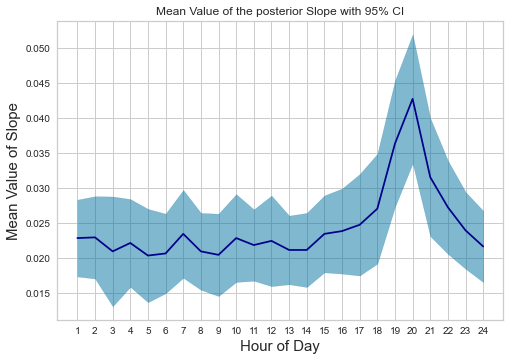

In [649]:
### code for graphing the slopes, intercepts and their 95% CI
#hours_567_summary
#hours_34_summary
#hours_1_2_summary
#hours_11_12_13_summary


slope_means= np.array([hours_1_2_summary['mean'][0],hours_1_2_summary['mean'][3],
                       hours_34_summary['mean'][0],hours_34_summary['mean'][3],
                       hours_567_summary['mean'][0], hours_567_summary['mean'][3], 
                       hours_567_summary['mean'][6],hours_8910_summary['mean'][0], 
                       hours_8910_summary['mean'][3], hours_8910_summary['mean'][6],
                      hours_11_12_13_summary['mean'][0],hours_11_12_13_summary['mean'][3],
                      hours_11_12_13_summary['mean'][6], hours_14thru24_summary['mean'][0],
                      hours_14thru24_summary['mean'][3],hours_14thru24_summary['mean'][6],
                      hours_14thru24_summary['mean'][9], hours_14thru24_summary['mean'][12],
                      hours_14thru24_summary['mean'][15], hours_14thru24_summary['mean'][18],
                      hours_14thru24_summary['mean'][21], hours_14thru24_summary['mean'][24],
                      hours_14thru24_summary['mean'][27],hours_14thru24_summary['mean'][30]])

slope_sds= np.array([hours_1_2_summary['sd'][0],hours_1_2_summary['sd'][3],
                     hours_34_summary['sd'][0],hours_34_summary['sd'][3],
                     hours_567_summary['sd'][0], hours_567_summary['sd'][3], 
                     hours_567_summary['sd'][6],hours_8910_summary['sd'][0], 
                     hours_8910_summary['sd'][3], hours_8910_summary['sd'][6],
                    hours_11_12_13_summary['sd'][0],hours_11_12_13_summary['sd'][3],
                      hours_11_12_13_summary['sd'][6],hours_14thru24_summary['sd'][0],
                      hours_14thru24_summary['sd'][3],hours_14thru24_summary['sd'][6],
                      hours_14thru24_summary['sd'][9], hours_14thru24_summary['sd'][12],
                      hours_14thru24_summary['sd'][15], hours_14thru24_summary['sd'][18],
                      hours_14thru24_summary['sd'][21], hours_14thru24_summary['sd'][24],
                      hours_14thru24_summary['sd'][27],hours_14thru24_summary['sd'][30]])

import seaborn as sns

xvals = [1,2,3,4,5,6,7,8, 9, 10,11,12,13, 14,15,16, 17, 18, 19,
        20, 21, 22, 23, 24]

ci_95 = 1.96*(slope_sds)

fig, ax3 = plt.subplots()
ax3.plot(xvals, slope_means, color = 'darkblue')
ax3.fill_between(xvals, (slope_means+abs(ci_95)), (slope_means-abs(ci_95)), color='b', alpha=.5)
ax3.set_xlabel('Hour of Day', fontsize = 15)
ax3.set_xticks(xvals)
#ax3.set_xticklabels( fontsize = 15)
plt.title('Mean Value of the posterior Slope with 95% CI')
ax3.set_ylabel('Mean Value of Slope', fontsize = 15)




Text(0, 0.5, 'Mean Value of the posterior SD')

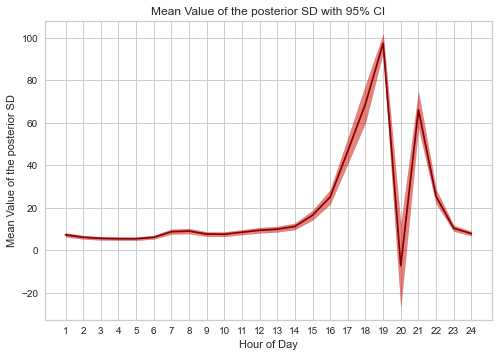

In [372]:
### code for graphing the sd's, intercepts and their 95% CI
#hours_567_summary
#hours_34_summary
#hours_1_2_summary
#hours_11_12_13_summary


sigma_means= np.array([hours_1_2_summary['mean'][2],hours_1_2_summary['mean'][5],
                       hours_34_summary['mean'][2],hours_34_summary['mean'][5],
                       hours_567_summary['mean'][2], hours_567_summary['mean'][5], 
                       hours_567_summary['mean'][8],hours_8910_summary['mean'][2], 
                       hours_8910_summary['mean'][5], hours_8910_summary['mean'][8],
                      hours_11_12_13_summary['mean'][2],hours_11_12_13_summary['mean'][5],
                      hours_11_12_13_summary['mean'][8],hours_14thru24_summary['mean'][2],
                      hours_14thru24_summary['mean'][5],hours_14thru24_summary['mean'][8],
                      hours_14thru24_summary['mean'][11], hours_14thru24_summary['mean'][14],
                      hours_14thru24_summary['mean'][17], hours_14thru24_summary['mean'][19],
                      hours_14thru24_summary['mean'][23], hours_14thru24_summary['mean'][26],
                      hours_14thru24_summary['mean'][29],hours_14thru24_summary['mean'][32]])

sigma_sds= np.array([hours_1_2_summary['sd'][2],hours_1_2_summary['sd'][5],
                     hours_34_summary['sd'][2],hours_34_summary['sd'][5],
                     hours_567_summary['sd'][2], hours_567_summary['sd'][5], 
                     hours_567_summary['sd'][8],hours_8910_summary['sd'][2], 
                     hours_8910_summary['sd'][5], hours_8910_summary['sd'][8],
                    hours_11_12_13_summary['sd'][2],hours_11_12_13_summary['sd'][5],
                      hours_11_12_13_summary['sd'][8],hours_14thru24_summary['sd'][2],
                      hours_14thru24_summary['sd'][5],hours_14thru24_summary['sd'][8],
                      hours_14thru24_summary['sd'][11], hours_14thru24_summary['sd'][14],
                      hours_14thru24_summary['sd'][17], hours_14thru24_summary['sd'][19],
                      hours_14thru24_summary['sd'][23], hours_14thru24_summary['sd'][26],
                      hours_14thru24_summary['sd'][29],hours_14thru24_summary['sd'][32]])





xvals = [1,2,3,4,5,6,7,8, 9, 10,11,12,13, 14,15,16, 17, 18, 19,
        20, 21, 22, 23, 24]

ci_95 = 1.96*(sigma_sds)

fig, ax3 = plt.subplots()
ax3.plot(xvals, sigma_means, color = 'darkred')
ax3.fill_between(xvals, (sigma_means-abs(ci_95)), (sigma_means+abs(ci_95)), color='r', alpha=.5)
ax3.set_xlabel('Hour of Day')
ax3.set_xticks(xvals)
plt.title('Mean Value of the posterior SD with 95% CI')
ax3.set_ylabel('Mean Value of the posterior SD')




In [345]:
print(slope_means - 1.96*slope_sds)
print(slope_means + 1.96*slope_sds)
print(1.96*slope_sds)
print(slope_means)

[0.017412 0.01712  0.01316  0.015928 0.013736 0.015016 0.017228 0.015512
 0.01462  0.016628 0.016804 0.016032 0.0163  ]
[0.028388 0.02888  0.02884  0.028472 0.027064 0.026384 0.029772 0.026488
 0.02638  0.029172 0.026996 0.028968 0.0261  ]
[0.005488 0.00588  0.00784  0.006272 0.006664 0.005684 0.006272 0.005488
 0.00588  0.006272 0.005096 0.006468 0.0049  ]
[0.0229 0.023  0.021  0.0222 0.0204 0.0207 0.0235 0.021  0.0205 0.0229
 0.0219 0.0225 0.0212]


In [351]:
print(0.021-0.00784)
print(0.021+0.00784)

0.013160000000000002
0.02884


In [252]:
#THIS IS THE  2018 MODEL FOR HOURS 8,9,10
N_SAMPLES = 9000
with pm.Model() as price_model_gauss_test_8910:
    
    ####HOUR 8######
    
    
    slope_8 = pm.Normal('slope_8', mu=0.0, sd = 10)

    intercept_8 = pm.Normal('intercept_8', mu=0.0, sd = 10)
        
    sigma_8 = pm.Uniform('sigma_8', lower =0, upper = 100)

    # Estimate of mean
    mean_8 = intercept_8 + slope_8*df_2018_list[7]['7DA Load Forecast'].to_numpy().reshape(-1, 1)

    lmp_obs_8 = pm.Normal('lmp_obs_8', mu = mean_8, sd = sigma_8, 
                          observed = df_2018_list[7]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1))
    ####HOUR 9######
    
    slope_9 = pm.Normal('slope_9', mu=0.0, sd = 10)

    intercept_9 = pm.Normal('intercept_9', mu=0.0, sd = 10)
        
    sigma_9 = pm.Uniform('sigma_9', lower =0, upper = 100)

    # Estimate of mean
    mean_9 = intercept_9 + slope_9*df_2018_list[8]['7DA Load Forecast'].to_numpy().reshape(-1, 1)

    lmp_obs_9 = pm.Normal('lmp_obs_9', mu = mean_9, sd = sigma_9, 
                          observed = df_2018_list[8]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1))

    
    ####HOUR 10######
    
    slope_10 = pm.Normal('slope_10', mu=0.0, sd = 10)

    intercept_10 = pm.Normal('intercept_10', mu=0.0, sd = 10)
        
    sigma_10 = pm.Uniform('sigma_10', lower =0, upper = 100)

    # Estimate of mean
    mean_10 = intercept_10 + slope_10*df_2018_list[9]['7DA Load Forecast'].to_numpy().reshape(-1, 1)

    lmp_obs_10 = pm.Normal('lmp_obs_10', mu = mean_10, sd = sigma_10, 
                          observed = df_2018_list[9]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1))
        
    
    #step = pm.HamiltonianMC()
    step = pm.Metropolis()

        # Sample from the posterior using the sampling method
    price_trace_gauss_hours_8910 = pm.sample(N_SAMPLES, step=step);

    



<ipython-input-252-f9ad9983464a>:53: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  price_trace_gauss_hours_8910 = pm.sample(N_SAMPLES, step=step);
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sigma_10]
>Metropolis: [intercept_10]
>Metropolis: [slope_10]
>Metropolis: [sigma_9]
>Metropolis: [intercept_9]
>Metropolis: [slope_9]
>Metropolis: [sigma_8]
>Metropolis: [intercept_8]
>Metropolis: [slope_8]


Sampling 4 chains for 1_000 tune and 9_000 draw iterations (4_000 + 36_000 draws total) took 1455 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


In [253]:
hours_8910_summary = az.summary(price_trace_gauss_hours_8910, var_names=["slope_8","intercept_8", "sigma_8",
                                               "slope_9","intercept_9", "sigma_9",
                                                "slope_10","intercept_10", "sigma_10"], round_to=4)
hours_8910_summary

/Users/ericgarc/miniconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
slope_8,0.0210,0.0028,0.0161,0.0265,0.0004,0.0003,55.8374,89.7276,1.0443
intercept_8,-12.1962,6.0553,-23.9285,-1.2981,0.8273,0.6287,56.2794,95.2642,1.0437
sigma_8,9.0915,0.5968,7.9968,10.2153,0.0087,0.0061,4762.0471,4868.2364,1.0012
slope_9,0.0205,0.0030,0.0147,0.0254,0.0005,0.0004,38.5830,135.1409,1.0867
intercept_9,-19.0650,6.8697,-30.2680,-5.6268,1.1726,0.8363,38.9323,150.1394,1.0848
sigma_9,7.6722,0.5193,6.7608,8.6693,0.0156,0.0110,1096.2159,4796.6924,1.0061
slope_10,0.0229,0.0032,0.0175,0.0292,0.0005,0.0004,34.9628,54.7893,1.0964
intercept_10,-26.7640,7.4330,-41.6157,-14.0249,1.2584,0.8973,35.2246,55.7021,1.0958
sigma_10,7.6200,0.5297,6.6720,8.6339,0.0227,0.0163,579.4308,1374.1955,1.0090


In [335]:
#THIS IS THE  2018 MODEL FOR HOURS 11, 12, 13
N_SAMPLES = 9000
with pm.Model() as price_model_gauss_test_11_12_13:
    
    ####HOUR 11######
    
    
    slope_11 = pm.Normal('slope_11', mu=0.0, sd = 10)

    intercept_11 = pm.Normal('intercept_11', mu=0.0, sd = 10)
        
    sigma_11 = pm.Uniform('sigma_11', lower =0, upper = 100)

    # Estimate of mean
    mean_11 = intercept_11 + slope_11*df_2018_list[10]['7DA Load Forecast'].to_numpy().reshape(-1, 1)

    lmp_obs_11 = pm.Normal('lmp_obs_11', mu = mean_11, sd = sigma_11, 
                          observed = df_2018_list[10]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1))
    ####HOUR 12######
    
    slope_12 = pm.Normal('slope_12', mu=0.0, sd = 10)

    intercept_12 = pm.Normal('intercept_12', mu=0.0, sd = 10)
        
    sigma_12 = pm.Uniform('sigma_12', lower =0, upper = 100)

    # Estimate of mean
    mean_12 = intercept_12 + slope_12*df_2018_list[11]['7DA Load Forecast'].to_numpy().reshape(-1, 1)

    lmp_obs_12 = pm.Normal('lmp_obs_12', mu = mean_12, sd = sigma_12, 
                          observed = df_2018_list[11]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1))

    
    ####HOUR 13######
    
    slope_13 = pm.Normal('slope_13', mu=0.0, sd = 10)

    intercept_13 = pm.Normal('intercept_13', mu=0.0, sd = 10)
        
    sigma_13 = pm.Uniform('sigma_13', lower =0, upper = 100)

    # Estimate of mean
    mean_13 = intercept_13 + slope_13*df_2018_list[12]['7DA Load Forecast'].to_numpy().reshape(-1, 1)

    lmp_obs_13 = pm.Normal('lmp_obs_13', mu = mean_13, sd = sigma_13, 
                          observed = df_2018_list[12]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1))
        
    
    #step = pm.HamiltonianMC()
    step = pm.Metropolis()

        # Sample from the posterior using the sampling method
    price_trace_gauss_hours__11_12_13 = pm.sample(N_SAMPLES, step=step);

    



<ipython-input-335-5298d3cec4cd>:53: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  price_trace_gauss_hours__11_12_13 = pm.sample(N_SAMPLES, step=step);
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sigma_13]
>Metropolis: [intercept_13]
>Metropolis: [slope_13]
>Metropolis: [sigma_12]
>Metropolis: [intercept_12]
>Metropolis: [slope_12]
>Metropolis: [sigma_11]
>Metropolis: [intercept_11]
>Metropolis: [slope_11]


Sampling 4 chains for 1_000 tune and 9_000 draw iterations (4_000 + 36_000 draws total) took 1465 seconds.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


In [336]:
hours_11_12_13_summary = az.summary(price_trace_gauss_hours__11_12_13, 
                                    var_names=["slope_11","intercept_11", "sigma_11",
                                               "slope_12","intercept_12", "sigma_12",
                                                "slope_13","intercept_13", "sigma_13"], round_to=4)
hours_11_12_13_summary

/Users/ericgarc/miniconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
slope_11,0.0219,0.0026,0.0174,0.0272,0.0004,0.0003,55.4008,65.8826,1.0432
intercept_11,-24.2777,6.4415,-36.0278,-12.1137,0.8636,0.6255,55.6354,67.2116,1.0448
sigma_11,8.5416,0.5730,7.4745,9.6187,0.0180,0.0128,1014.5114,4015.8473,1.0032
slope_12,0.0225,0.0033,0.0170,0.0285,0.0008,0.0006,16.1552,43.6610,1.2352
intercept_12,-24.7876,8.0885,-40.2958,-11.6090,2.0253,1.4591,16.2749,41.6151,1.2337
sigma_12,9.4696,0.6359,8.3207,10.7162,0.0300,0.0214,473.2311,1331.1390,1.0142
slope_13,0.0212,0.0025,0.0164,0.0261,0.0004,0.0003,49.6892,33.6757,1.0732
intercept_13,-20.5742,6.3978,-33.3307,-8.5113,0.9252,0.6583,50.0727,31.4692,1.0688
sigma_13,9.9772,0.6551,8.8251,11.2451,0.0210,0.0151,1056.2525,5024.4799,1.0028


In [353]:
#THIS IS THE  2018 MODEL FOR HOURS 14 through 24
N_SAMPLES = 9000
with pm.Model() as price_model_gauss_test_14thru24:
    
    ####HOUR 14######
    
    
    slope_14 = pm.Normal('slope_14', mu=0.0, sd = 10)

    intercept_14 = pm.Normal('intercept_14', mu=0.0, sd = 10)
        
    sigma_14 = pm.Uniform('sigma_14', lower =0, upper = 100)

    # Estimate of mean
    mean_14 = intercept_14 + slope_14*df_2018_list[13]['7DA Load Forecast'].to_numpy().reshape(-1, 1)

    lmp_obs_14 = pm.Normal('lmp_obs_14', mu = mean_14, sd = sigma_14, 
                          observed = df_2018_list[13]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1))
   
    ####HOUR 15######
    
    slope_15 = pm.Normal('slope_15', mu=0.0, sd = 10)

    intercept_15 = pm.Normal('intercept_15', mu=0.0, sd = 10)
        
    sigma_15 = pm.Uniform('sigma_15', lower =0, upper = 100)

    # Estimate of mean
    mean_15 = intercept_15 + slope_15*df_2018_list[14]['7DA Load Forecast'].to_numpy().reshape(-1, 1)

    lmp_obs_15 = pm.Normal('lmp_obs_15', mu = mean_15, sd = sigma_15, 
                          observed = df_2018_list[14]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1))

    
    ####HOUR 16######
    
    slope_16 = pm.Normal('slope_16', mu=0.0, sd = 10)

    intercept_16 = pm.Normal('intercept_16', mu=0.0, sd = 10)
        
    sigma_16 = pm.Uniform('sigma_16', lower =0, upper = 100)

    # Estimate of mean
    mean_16 = intercept_16 + slope_16*df_2018_list[15]['7DA Load Forecast'].to_numpy().reshape(-1, 1)

    lmp_obs_16 = pm.Normal('lmp_obs_16', mu = mean_16, sd = sigma_16, 
                          observed = df_2018_list[15]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1))
     
    ####HOUR 17######
    
    slope_17 = pm.Normal('slope_17', mu=0.0, sd = 10)

    intercept_17 = pm.Normal('intercept_17', mu=0.0, sd = 10)
        
    sigma_17 = pm.Uniform('sigma_17', lower =0, upper = 100)

    # Estimate of mean
    mean_17 = intercept_17 + slope_17*df_2018_list[16]['7DA Load Forecast'].to_numpy().reshape(-1, 1)

    lmp_obs_17 = pm.Normal('lmp_obs_17', mu = mean_17, sd = sigma_17, 
                          observed = df_2018_list[16]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1))
            
    
     ####HOUR 18######
    
    slope_18 = pm.Normal('slope_18', mu=0.0, sd = 10)

    intercept_18 = pm.Normal('intercept_18', mu=0.0, sd = 10)
        
    sigma_18 = pm.Uniform('sigma_18', lower =0, upper = 100)

    # Estimate of mean
    mean_18 = intercept_18 + slope_18*df_2018_list[17]['7DA Load Forecast'].to_numpy().reshape(-1, 1)

    lmp_obs_18 = pm.Normal('lmp_obs_18', mu = mean_18, sd = sigma_18, 
                          observed = df_2018_list[17]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1))
            
    
     ####HOUR 19######
    
    slope_19 = pm.Normal('slope_19', mu=0.0, sd = 10)

    intercept_19 = pm.Normal('intercept_19', mu=0.0, sd = 10)
        
    sigma_19 = pm.Uniform('sigma_19', lower =0, upper = 100)

    # Estimate of mean
    mean_19 = intercept_19 + slope_19*df_2018_list[18]['7DA Load Forecast'].to_numpy().reshape(-1, 1)

    lmp_obs_19 = pm.Normal('lmp_obs_19', mu = mean_19, sd = sigma_19, 
                          observed = df_2018_list[18]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1))
            
    ####HOUR 20######
    
    slope_20 = pm.Normal('slope_20', mu=0.0, sd = 10)

    intercept_20 = pm.Normal('intercept_20', mu=0.0, sd = 10)
        
    sigma_20 = pm.Uniform('sigma_20', lower =0, upper = 100)

    # Estimate of mean
    mean_20 = intercept_20 + slope_20*df_2018_list[19]['7DA Load Forecast'].to_numpy().reshape(-1, 1)

    lmp_obs_20 = pm.Normal('lmp_obs_20', mu = mean_20, sd = sigma_20, 
                          observed = df_2018_list[19]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1))
                
    
      ####HOUR 21######
    
    slope_21 = pm.Normal('slope_21', mu=0.0, sd = 10)

    intercept_21 = pm.Normal('intercept_21', mu=0.0, sd = 10)
        
    sigma_21 = pm.Uniform('sigma_21', lower =0, upper = 100)

    # Estimate of mean
    mean_21 = intercept_21 + slope_21*df_2018_list[20]['7DA Load Forecast'].to_numpy().reshape(-1, 1)

    lmp_obs_21 = pm.Normal('lmp_obs_21', mu = mean_21, sd = sigma_21, 
                          observed = df_2018_list[20]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1))
                
        
    ####HOUR 22######
    
    slope_22 = pm.Normal('slope_22', mu=0.0, sd = 10)

    intercept_22 = pm.Normal('intercept_22', mu=0.0, sd = 10)
        
    sigma_22 = pm.Uniform('sigma_22', lower =0, upper = 100)

    # Estimate of mean
    mean_22 = intercept_22 + slope_22*df_2018_list[21]['7DA Load Forecast'].to_numpy().reshape(-1, 1)

    lmp_obs_22 = pm.Normal('lmp_obs_22', mu = mean_22, sd = sigma_22, 
                          observed = df_2018_list[21]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1))
                    
       ####HOUR 23######
    
    slope_23 = pm.Normal('slope_23', mu=0.0, sd = 10)

    intercept_23 = pm.Normal('intercept_23', mu=0.0, sd = 10)
        
    sigma_23 = pm.Uniform('sigma_23', lower =0, upper = 100)

    # Estimate of mean
    mean_23 = intercept_23 + slope_23*df_2018_list[22]['7DA Load Forecast'].to_numpy().reshape(-1, 1)

    lmp_obs_23 = pm.Normal('lmp_obs_23', mu = mean_23, sd = sigma_23, 
                          observed = df_2018_list[22]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1))
 
       ####HOUR 24######
    
    slope_24 = pm.Normal('slope_24', mu=0.0, sd = 10)

    intercept_24 = pm.Normal('intercept_24', mu=0.0, sd = 10)
        
    sigma_24 = pm.Uniform('sigma_24', lower =0, upper = 100)

    # Estimate of mean
    mean_24 = intercept_24 + slope_24*df_2018_list[23]['7DA Load Forecast'].to_numpy().reshape(-1, 1)

    lmp_obs_24 = pm.Normal('lmp_obs_24', mu = mean_24, sd = sigma_24, 
                          observed = df_2018_list[23]['DA LMP PGE DLAP'].to_numpy().reshape(-1, 1))
                    

    step = pm.Metropolis()

        # Sample from the posterior using the sampling method
    price_trace_gauss_test_14thru24 = pm.sample(N_SAMPLES, step=step);

    



<ipython-input-353-949f43453c43>:169: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  price_trace_gauss_test_14thru24 = pm.sample(N_SAMPLES, step=step);
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sigma_24]
>Metropolis: [intercept_24]
>Metropolis: [slope_24]
>Metropolis: [sigma_23]
>Metropolis: [intercept_23]
>Metropolis: [slope_23]
>Metropolis: [sigma_22]
>Metropolis: [intercept_22]
>Metropolis: [slope_22]
>Metropolis: [sigma_21]
>Metropolis: [intercept_21]
>Metropolis: [slope_21]
>Metropolis: [sigma_20]
>Metropolis: [intercept_20]
>Metropolis: [slope_20]
>Metropolis: [sigma_19]
>Metropolis: [intercept_19]
>Metropolis: [slope_19]
>Metropolis: [sigma_18]
>Metropolis: [intercept_18]
>Metropolis: [slope_18]
>Metropolis: [sigma_17]
>Metropolis: [intercept_17]
>Metropolis: [slope_17]
>Metrop

Sampling 4 chains for 1_000 tune and 9_000 draw iterations (4_000 + 36_000 draws total) took 15926 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


In [355]:
hours_14thru24_summary = az.summary(price_trace_gauss_test_14thru24, 
                                    var_names=["slope_14","intercept_14", "sigma_14",
                                               "slope_15","intercept_15", "sigma_15",
                                                "slope_16","intercept_16", "sigma_16",
                                              "slope_17","intercept_17", "sigma_17",
                                              "slope_18","intercept_18", "sigma_18",
                                              "slope_19","intercept_19", "sigma_19",
                                              "slope_20","intercept_20", "sigma_20",
                                              "slope_21","intercept_21", "sigma_21",
                                              "slope_22","intercept_22", "sigma_22",
                                              "slope_23","intercept_23", "sigma_23",
                                              "slope_24","intercept_24", "sigma_24"], round_to=4)
hours_14thru24_summary

/Users/ericgarc/miniconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
slope_14,0.0212,0.0027,0.0162,0.0262,0.0004,0.0003,56.0692,91.4443,1.0673
intercept_14,-19.0336,6.9601,-32.6433,-6.1300,0.9381,0.7615,56.2482,96.7233,1.0671
sigma_14,11.2717,0.7428,9.8941,12.6170,0.0137,0.0097,2946.1905,4623.8945,1.0030
slope_15,0.0235,0.0028,0.0181,0.0289,0.0002,0.0002,144.0671,298.5634,1.0408
intercept_15,-21.8257,7.4970,-36.2905,-7.6137,0.6181,0.4379,146.6539,292.7231,1.0398
sigma_15,16.5524,1.1325,14.4489,18.6378,0.0211,0.0149,2939.7120,4465.1968,1.0024
slope_16,0.0239,0.0031,0.0176,0.0292,0.0002,0.0001,282.1683,582.1483,1.0101
intercept_16,-18.8037,8.3115,-34.0568,-2.9666,0.4899,0.3468,288.1821,619.7177,1.0096
sigma_16,25.1582,1.6929,22.0410,28.3327,0.0282,0.0199,3642.0398,4755.5616,1.0012
slope_17,0.0248,0.0037,0.0174,0.0314,0.0002,0.0001,387.0510,837.6704,1.0142


Text(0, 0.5, 'Probability Density')

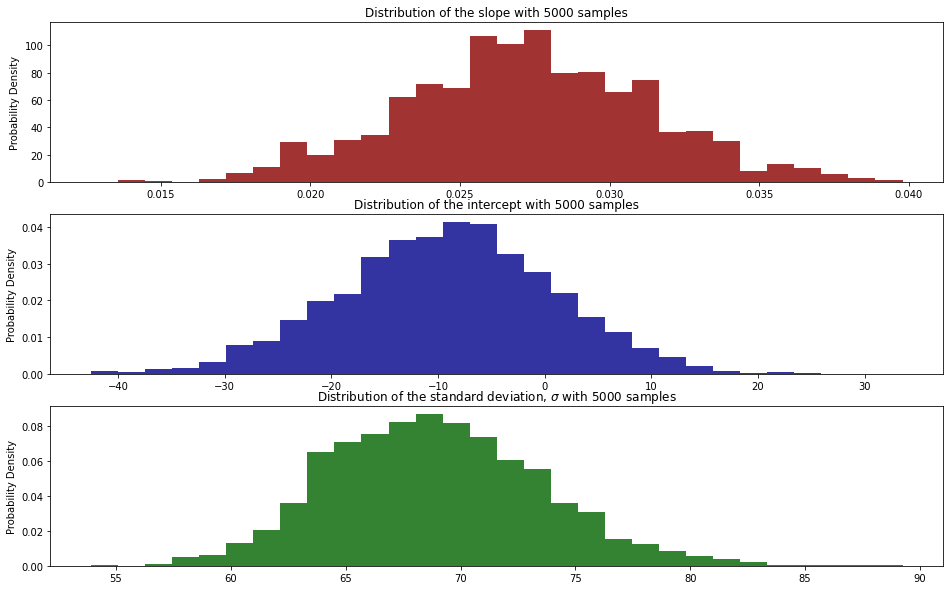

In [17]:
slope_samples = price_trace_gauss["slope"][5000:, None]
intercept_samples = price_trace_gauss["intercept"][5000:, None]
sigma_samples = price_trace_gauss["sigma"][5000:, None]
figsize(16, 10)

plt.subplot(311)
plt.title(r"""Distribution of the slope with %d samples""" % N_SAMPLES)

plt.hist(slope_samples, histtype='stepfilled', 
         color = 'darkred', bins=30, alpha=0.8, density=True);
plt.ylabel('Probability Density')


plt.subplot(312)
plt.title(r"""Distribution of the intercept with %d samples""" % N_SAMPLES)

plt.hist(intercept_samples, histtype='stepfilled', 
         color = 'darkblue', bins=30, alpha=0.8, density=True);
plt.ylabel('Probability Density')

plt.subplot(313)
plt.title(r"""Distribution of the standard deviation, $\sigma$ with %d samples""" % N_SAMPLES)

plt.hist(sigma_samples, histtype='stepfilled', 
         color = 'darkgreen', bins=30, alpha=0.8, density=True);
plt.ylabel('Probability Density')


/Users/ericgarc/miniconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


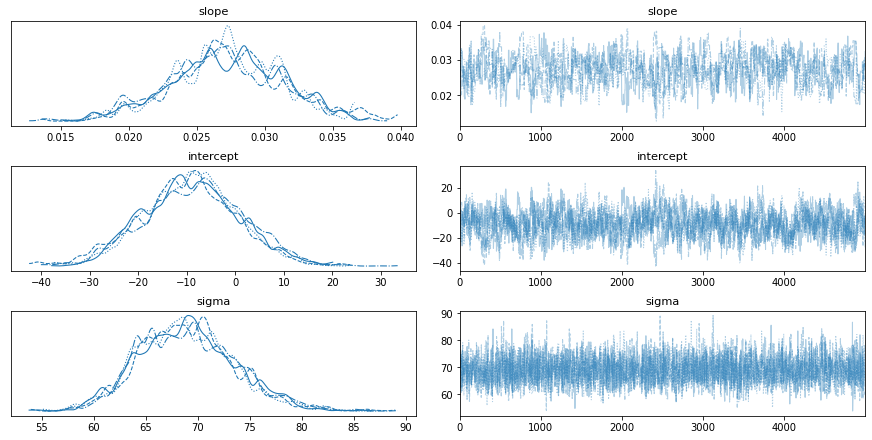

In [18]:

az.plot_trace(price_trace_gauss);

<ipython-input-663-42629299d48a>:1: DeprecationWarning: The function `autocorrplot` from PyMC3 is just an alias for `plot_autocorr` from ArviZ. Please switch to `pymc3.plot_autocorr` or `arviz.plot_autocorr`.
  pm.autocorrplot(price_trace_gauss, ['slope', 'intercept', 'sigma']);
/Users/ericgarc/miniconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


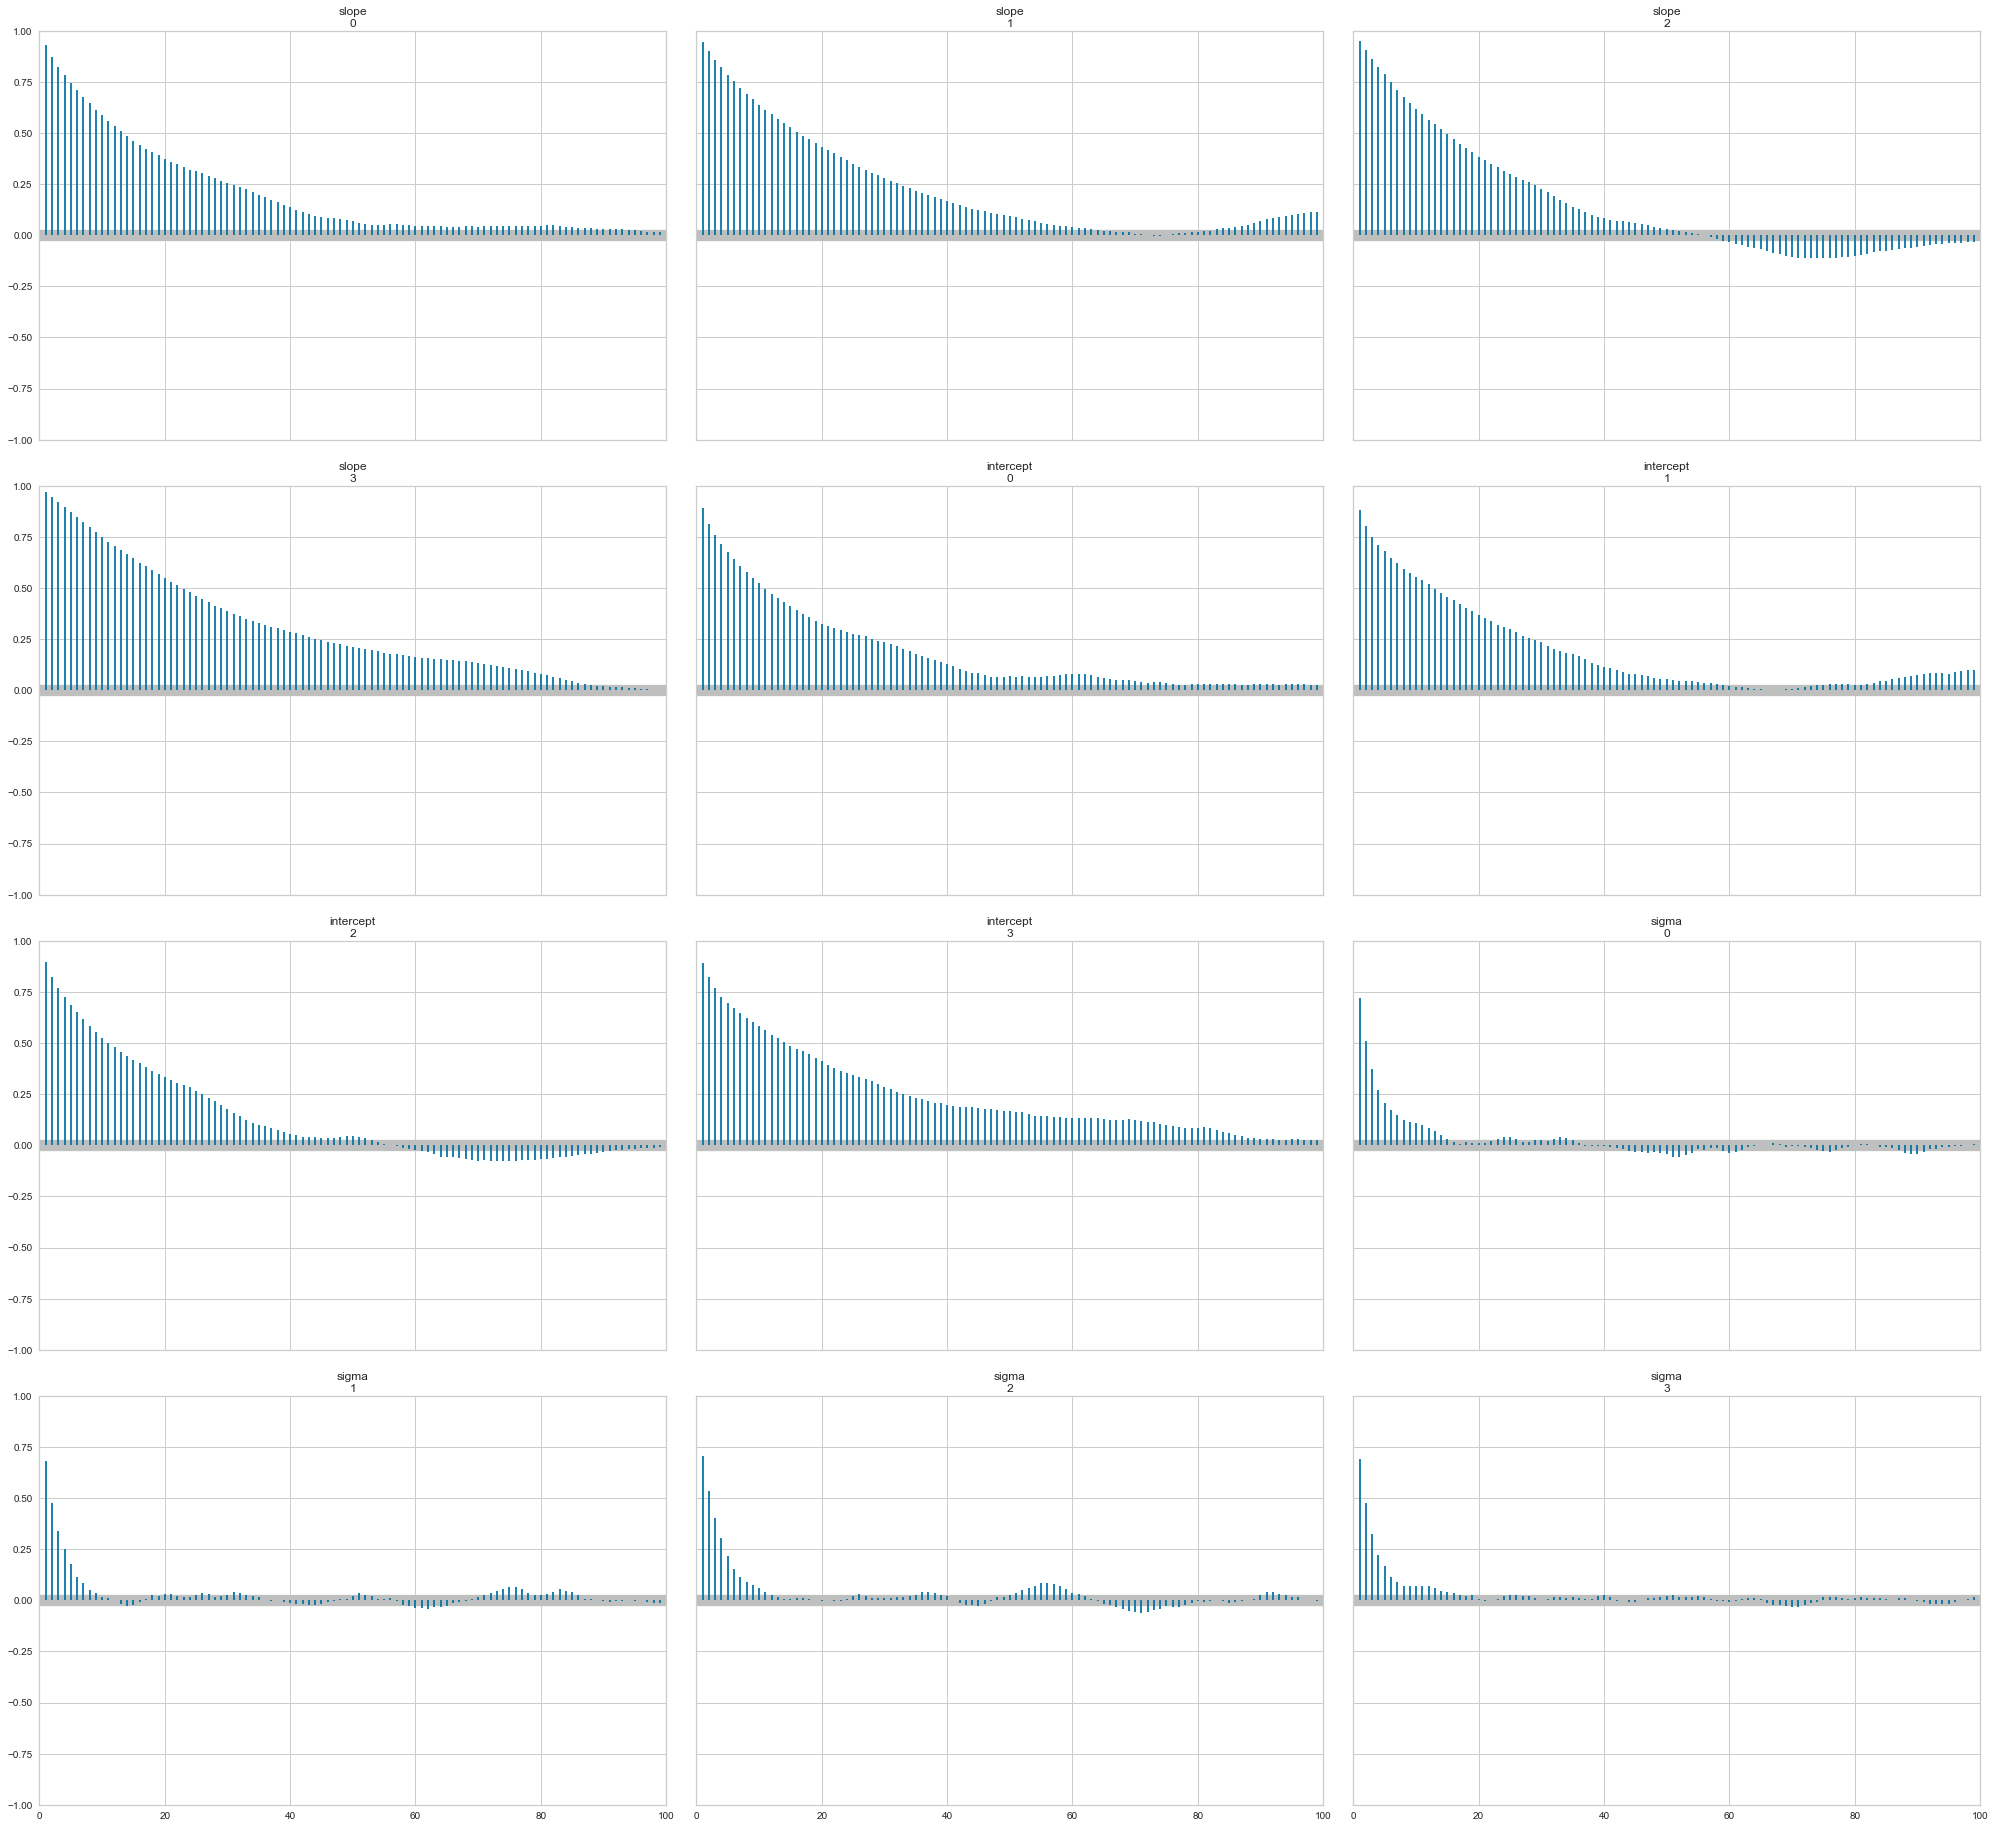

In [663]:
pm.autocorrplot(price_trace_gauss, ['slope', 'intercept', 'sigma']);

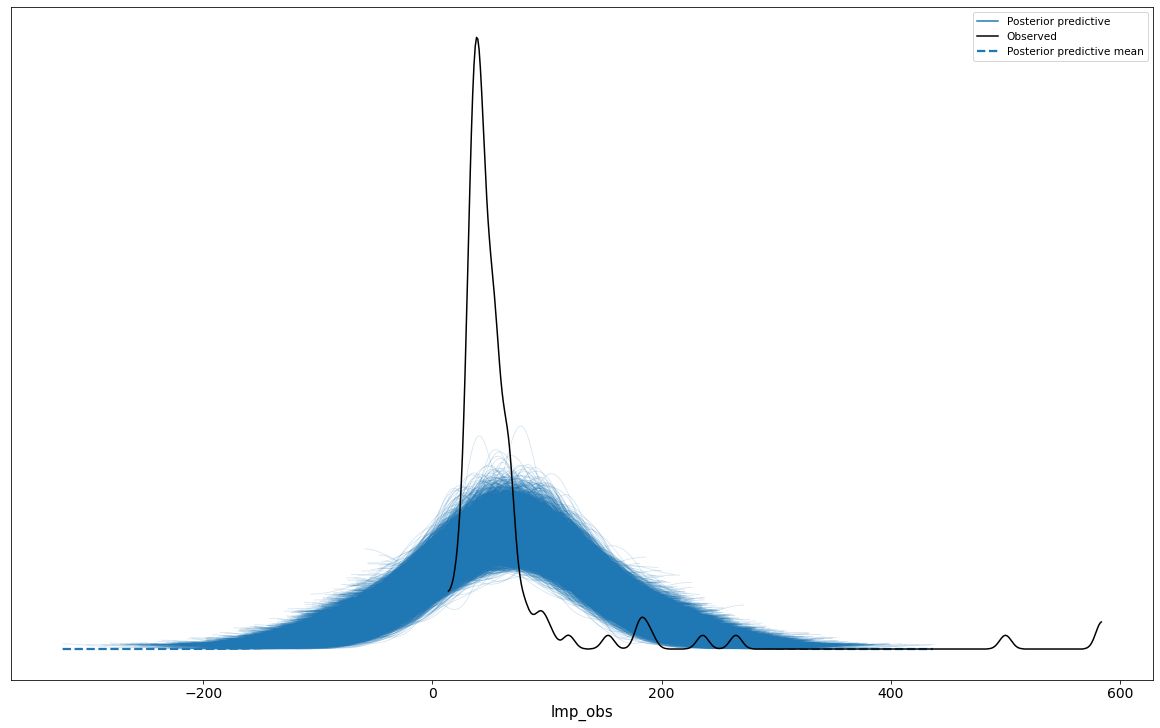

In [19]:
with price_model_gauss:
    ppc = pm.sample_posterior_predictive(
        price_trace_gauss, var_names=["slope", "intercept", "sigma", "lmp_obs"], random_seed=20
    )
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=price_model_gauss));    

Text(0, 0.5, 'Parameter')

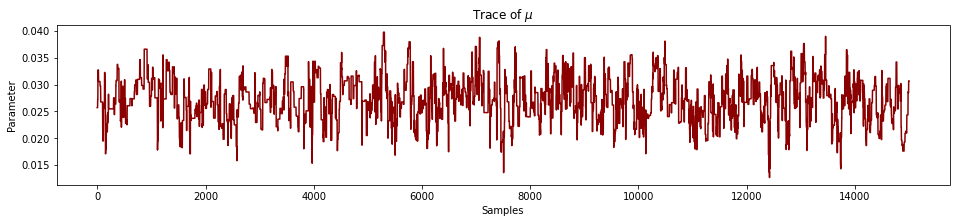

In [21]:
# Plotting the trace of mu
plt.subplot(311)
plt.title(r'Trace of $\mu$')
plt.plot(slope_samples, color = 'darkred')
plt.xlabel('Samples'); plt.ylabel('Parameter')

/Users/ericgarc/miniconda3/lib/python3.8/site-packages/pymc3/plots/posteriorplot.py:59: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  warnings.warn(


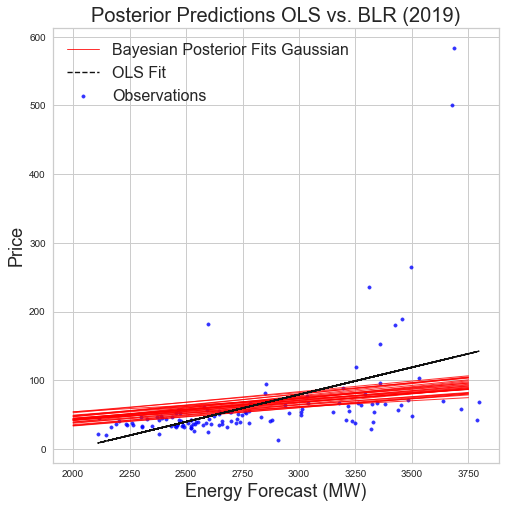

In [637]:

plt.figure(figsize = (8, 8))
pm.plot_posterior_predictive_glm(price_trace_gauss, samples = 30, eval=np.linspace(2000, 3750), linewidth = 1, 
                                 color = 'red', alpha = 0.8, label = 'Bayesian Posterior Fits Gaussian',
                                lm = lambda x, sample: sample['intercept'] + sample['slope'] * x);
plt.scatter(array_2018_6pm_load,array_2018_6pm_lmp , s = 12, alpha = 0.8, c = 'blue', label = 'Observations');
plt.plot(array_2018_6pm_load, basic_model.intercept_ + array_2018_6pm_load*basic_model.coef_, 'k--', 
         label = 'OLS Fit', linewidth = 1.4);
plt.title('Posterior Predictions OLS vs. BLR (2019)', size = 20); plt.xlabel('Energy Forecast (MW)', size = 18);
plt.ylabel('Price', size = 18);

plt.legend(prop={'size': 16});


In [21]:
N_SAMPLES = 5000
with pm.Model() as price_model_student:
   
    nu = pm.Gamma('nu', alpha = 2, beta = 0.1)
    
    intercept = pm.Uniform('intercept', lower = 0, upper = 100)
    
    slope =  pm.HalfNormal('slope', sd = 10)
    
    sigma = pm.Uniform('sigma', lower = 0, upper = 100)
    
    # Estimate of mean
    mean = intercept + slope*array_2018_6pm_load
    
    lmp_obs =  pm.StudentT('lmp_obs', nu=nu, mu= mean , sigma=sigma, observed = array_2018_6pm_lmp)  
    #step = pm.HamiltonianMC()
    step = pm.Metropolis()
    
    # Sample from the posterior using the sampling method
    price_trace_student = pm.sample(N_SAMPLES, step=step);

/Users/ericgarc/miniconda3/lib/python3.8/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
<ipython-input-21-839370664580>:20: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  price_trace_student = pm.sample(N_SAMPLES, step=step);
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sigma]
>Metropolis: [slope]
>Metropolis: [intercept]
>Metropolis: [nu]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 342 seconds.
The number of effective samples is smaller than 10% for some parameters.


In [25]:
az.summary(price_trace_student, var_names=["nu","slope","intercept", "sigma"], round_to=2)

/Users/ericgarc/miniconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
nu,1.34,0.21,0.95,1.73,0.00,0.00,2013.51,3096.69,1.00
slope,0.02,0.00,0.01,0.02,0.00,0.00,243.60,125.02,1.02
intercept,2.47,2.40,0.00,7.20,0.21,0.18,226.47,128.45,1.02
sigma,9.13,1.12,7.17,11.26,0.03,0.02,1808.52,2528.94,1.00


/Users/ericgarc/miniconda3/lib/python3.8/site-packages/pymc3/plots/posteriorplot.py:59: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  warnings.warn(
/Users/ericgarc/miniconda3/lib/python3.8/site-packages/pymc3/plots/posteriorplot.py:59: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  warnings.warn(


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

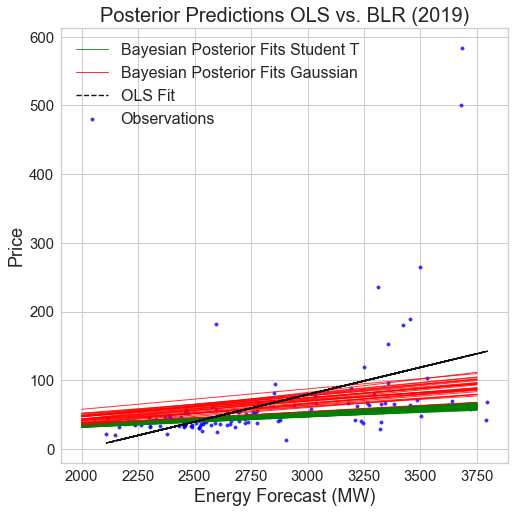

In [642]:
plt.figure(figsize = (8, 8))
pm.plot_posterior_predictive_glm(price_trace_student, samples = 300, eval=np.linspace(2000, 3750), linewidth = 1, 
                                 color = 'green', alpha = 0.8, label = 'Bayesian Posterior Fits Student T',
                                lm = lambda x, sample: sample['intercept'] + sample['slope'] * x);

pm.plot_posterior_predictive_glm(price_trace_gauss, samples = 30, eval=np.linspace(2000, 3750), linewidth = 1, 
                                 color = 'red', alpha = 0.8, label = 'Bayesian Posterior Fits Gaussian',
                                lm = lambda x, sample: sample['intercept'] + sample['slope'] * x);


plt.scatter(array_2018_6pm_load,array_2018_6pm_lmp , s = 12, alpha = 0.8, c = 'blue', label = 'Observations');

plt.plot(array_2018_6pm_load, basic_model.intercept_ + array_2018_6pm_load*basic_model.coef_, 'k--', 
         label = 'OLS Fit', linewidth = 1.4);
plt.title('Posterior Predictions OLS vs. BLR (2019)', size = 20); plt.xlabel('Energy Forecast (MW)', size = 18);
plt.ylabel('Price', size = 18);
plt.legend(prop={'size': 16});
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

/Users/ericgarc/miniconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


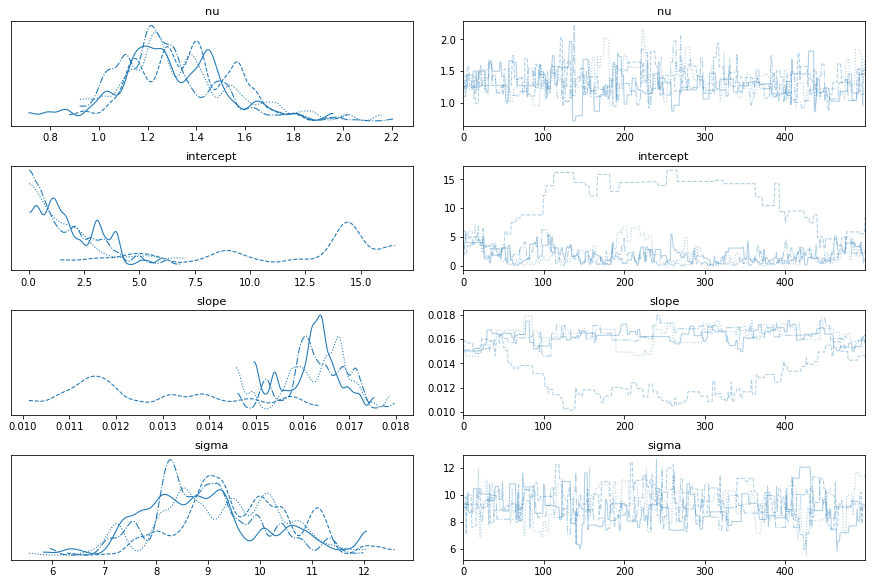

In [17]:
az.plot_trace(price_trace_student);

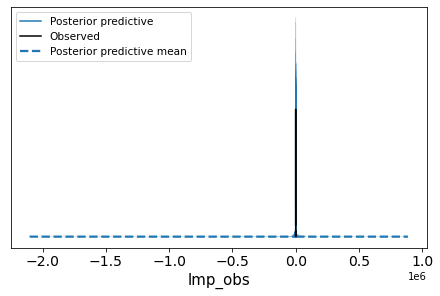

In [20]:
with price_model_student:
    ppc_stud = pm.sample_posterior_predictive(
        price_trace_student, var_names=["nu", "intercept","slope", "sigma", "lmp_obs"], random_seed=40
    )
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc_stud, model=price_model_student)); 

In [67]:
"""
Here I have converted a column vector of sequential hours of 2018 data to a matrix of 
dimension (number of days) x (24 hours) for the prices
"""

lmp_2018_df = df_2018['DA LMP PGE DLAP']

lmp_2018_arr = to_matrix(lmp_2018_df)


(122, 24)

In [268]:
##this was provided in the custom distributions example notebook: It was taken from the following website
##https://github.com/jmschrei/pomegranate/issues/561##

class StudentTDistribution():
    def __init__(self, mu, std, df=1.0):
        self.mu = mu
        self.std = std
        self.df = df
        self.parameters = (self.mu, self.std)
        self.d = 1
        self.summaries = np.zeros(3)

    def probability(self, X):
        return np.exp(self.log_probability(X))
        
    def log_probability(self, X):
        return scipy.stats.t.logpdf(X, self.df, self.mu, self.std)

    def summarize(self, X, w=None):
        if w is None:
            w = np.ones(X.shape[0])

        X = X.reshape(X.shape[0])
        self.summaries[0] += w.sum()
        self.summaries[1] += X.dot(w)
        self.summaries[2] += (X ** 2.).dot(w)

    def from_summaries(self, inertia=0.0):
        self.mu = self.summaries[1] / self.summaries[0]
        self.std = self.summaries[2] / self.summaries[0] - self.summaries[1] ** 2 / (self.summaries[0] ** 2)
        self.std = np.sqrt(self.std)
        self.parameters = (self.mu, self.std)
        self.clear_summaries()

    def clear_summaries(self, inertia=0.0):
        self.summaries = np.zeros(3)

    @classmethod
    def from_samples(cls, X, weights=None, df=1):
        d = StudentTDistribution(0, 0, df)
        d.summarize(X, weights)
        d.from_summaries()
        return d

    @classmethod
    def blank(cls):
        return StudentTDistribution(0, 0)

In [269]:
from pomegranate import *
model = HiddenMarkovModel.from_samples(StudentTDistribution, n_components=3, X=array_2018_6pm_lmp)

In [478]:
#Training the HMM on energy demand forecast

from sklearn.model_selection import train_test_split

load_data_train_2018, load_data_test_2018 = train_test_split(array_2018_6pm_load, test_size=0.2, random_state=0)


states = [2,3,4,5]
log_prob_stud_load_test = []
pred_states_train_stud_load = []
pred_states_test_stud_load = []
log_prob_norm_load_test = []
pred_states_train_stud_load = []
pred_states_train_norm_load = []
pred_states_test_norm_load = []
pred_states_test_stud_load = []

pred_states_2019_norm_load = []
pred_states_2018_norm_load = []
for i in  states:
    print(i)
    model_stud_load = HiddenMarkovModel.from_samples(StudentTDistribution, n_components=i, X=load_data_train_2018)
    model_norm_load = HiddenMarkovModel.from_samples(NormalDistribution, n_components=i, X=load_data_train_2018)
    
    log_prob_stud_load_test.append(model_stud_load.log_probability(load_data_test_2018))
    log_prob_norm_load_test.append(model_norm_load.log_probability(load_data_test_2018))
    
    pred_states_train_stud_load.append(model_stud_load.predict(load_data_train_2018))
    pred_states_train_norm_load.append(model_norm_load.predict(load_data_train_2018))
    
    pred_states_test_stud_load.append(model_stud_load.predict(load_data_test_2018))
    pred_states_test_norm_load.append(model_norm_load.predict(load_data_test_2018))
    
    pred_states_2019_norm_load.append(model_norm_load.predict(array_2019_6pm_load))
    pred_states_2018_norm_load.append(model_norm_load.predict(array_2018_6pm_load))

    


2
3
4
5


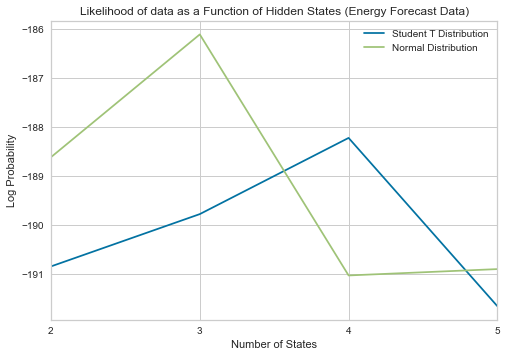

In [504]:
#plotting the trained hmm on train test split of load 2018

plt.plot(log_prob_stud_load_test, label = 'Student T Distribution')
plt.plot(log_prob_norm_load_test, label = 'Normal Distribution')
plt.xlabel('Number of States')
plt.xticks(ticks=[0,1,2,3], labels = [2,3,4,5])
plt.xlim(0,3)
plt.ylabel('Log Probability')
plt.title('Likelihood of data as a Function of Hidden States (Energy Forecast Data)')

plt.legend()
plt.show()

In [510]:
#Training the HMM on prices

#Training the HMM on energy demand forecast

from sklearn.model_selection import train_test_split

lmp_data_train_2018, lmp_data_test_2018 = train_test_split(array_2018_6pm_lmp, test_size=0.2, random_state=0)




states = [2,3,4,5]
log_prob_stud_lmp = []
pred_states_train_stud = []
pred_states_test_stud = []
log_prob_norm_lmp = []
pred_states_train_norm = []
pred_states_test_norm = []
pred_states_2019_norm_lmp = []
pred_states_2018_norm_lmp = []
for i in  states:
    model_stud = HiddenMarkovModel.from_samples(StudentTDistribution, n_components=i, X=lmp_data_train_2018)
    model_norm = HiddenMarkovModel.from_samples(NormalDistribution, n_components=i, X=lmp_data_train_2018)
    
    log_prob_stud_lmp.append(model_stud.log_probability(lmp_data_test_2018))
    log_prob_norm_lmp.append(model_norm.log_probability(lmp_data_test_2018))
    
    pred_states_train_stud.append(model_stud.predict(lmp_data_train_2018))
    pred_states_train_norm.append(model_norm.predict(lmp_data_train_2018))
    
    pred_states_test_stud.append(model_stud.predict(lmp_data_test_2018))
    pred_states_test_norm.append(model_norm.predict(lmp_data_test_2018))

    pred_states_2019_norm_lmp.append(model_norm.predict(array_2019_6pm_lmp))
    pred_states_2018_norm_lmp.append(model_norm.predict(array_2018_6pm_lmp))



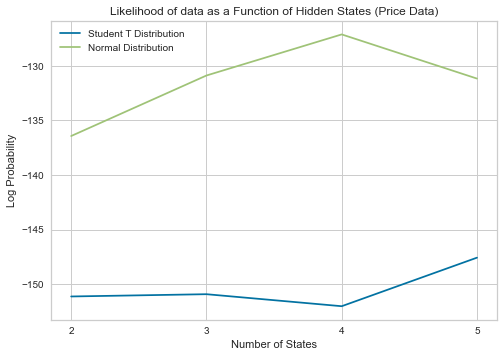

In [502]:
#plotting the trained hmm on prices

plt.plot(log_prob_stud_lmp, label = 'Student T Distribution')
plt.plot(log_prob_norm_lmp, label = 'Normal Distribution')
plt.xlabel('Number of States')
plt.xticks(ticks=[0,1,2,3], labels=states)
plt.ylabel('Log Probability')
plt.title('Likelihood of data as a Function of Hidden States (Price Data)')
plt.legend()
plt.show()

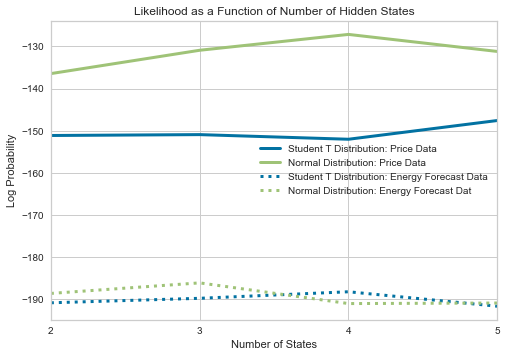

In [505]:
plt.plot(log_prob_stud_lmp, color = 'b', linewidth=3, label = 'Student T Distribution: Price Data')
plt.plot(log_prob_norm_lmp,color = 'g',  linewidth=3,label = 'Normal Distribution: Price Data')
plt.plot(log_prob_stud_load_test, color = 'b',linewidth=3,linestyle = ":", 
         label = 'Student T Distribution: Energy Forecast Data')
plt.plot(log_prob_norm_load_test, color = 'g',linewidth=3,linestyle = ":", 
         label = 'Normal Distribution: Energy Forecast Dat')
plt.xlabel('Number of States')
plt.xlim(0,3)
plt.xticks(ticks=[0,1,2,3], labels=states)
plt.ylabel('Log Probability')
plt.title('Likelihood as a Function of Number of Hidden States')
plt.legend()
plt.show()

In [511]:
pred_states_2018_norm_4class_lmp = np.array(pred_states_2018_norm_lmp[2])
pred_states_2018_norm_4class_lmp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 3, 0, 3, 3, 0, 0, 0, 0, 0,
       3, 1, 1, 1, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [516]:
###The predicted states based on 2018 price

pred_states_2018_norm_4class_lmp_hmm = np.array(pred_states_2018_norm_lmp[2])
pred_states_2019_norm_4class_lmp_hmm = np.array(pred_states_2019_norm_lmp[2])



"""2018"""
## attaching the class labels to the the 6pm array 2018

lmp_6pm_4class_2018_lmp_hmm = np.concatenate((pred_states_2018_norm_4class_lmp_hmm.reshape(-1, 1), array_2018_6pm_lmp), axis =1) 
load_6pm_4class_2018_lmp_hmm = np.concatenate((pred_states_2018_norm_4class_lmp_hmm.reshape(-1, 1), array_2018_6pm_load), axis =1) 

###making them into pandas dataframes for filtering 2018

df_lmp_6pm_4class_2018_lmp_hmm = pd.DataFrame(lmp_6pm_4class_2018_lmp_hmm, columns = ['States','LMP'])
df_load_6pm_4class_2018_lmp_hmm = pd.DataFrame(load_6pm_4class_2018_lmp_hmm, columns = ['States','MW'])


##subset dataframes to create individual models for all of them 

###LMP###
df_2018_lmp_6pm_4class_1_lmp_hmm = df_lmp_6pm_4class_2018_lmp_hmm[df_lmp_6pm_4class_2018_lmp_hmm['States'] == 0]
df_2018_lmp_6pm_4class_2_lmp_hmm = df_lmp_6pm_4class_2018_lmp_hmm[df_lmp_6pm_4class_2018_lmp_hmm['States'] == 1]
df_2018_lmp_6pm_4class_3_lmp_hmm = df_lmp_6pm_4class_2018_lmp_hmm[df_lmp_6pm_4class_2018_lmp_hmm['States'] == 2]
df_2018_lmp_6pm_4class_4_lmp_hmm = df_lmp_6pm_4class_2018_lmp_hmm[df_lmp_6pm_4class_2018_lmp_hmm['States'] == 3]


###Load###
df_2018_load_6pm_4class_1_lmp_hmm = df_load_6pm_4class_2018_lmp_hmm[df_load_6pm_4class_2018_lmp_hmm['States'] == 0]
df_2018_load_6pm_4class_2_lmp_hmm = df_load_6pm_4class_2018_lmp_hmm[df_load_6pm_4class_2018_lmp_hmm['States'] == 1]
df_2018_load_6pm_4class_3_lmp_hmm = df_load_6pm_4class_2018_lmp_hmm[df_load_6pm_4class_2018_lmp_hmm['States'] == 2]
df_2018_load_6pm_4class_4_lmp_hmm = df_load_6pm_4class_2018_lmp_hmm[df_load_6pm_4class_2018_lmp_hmm['States'] == 3]


"""2019"""
## attaching the class labels to the the 6pm array 2019

lmp_6pm_4class_2019_lmp_hmm = np.concatenate((pred_states_2019_norm_4class_lmp_hmm.reshape(-1, 1),
                                              array_2019_6pm_lmp), axis =1) 
load_6pm_4class_2019_lmp_hmm = np.concatenate((pred_states_2019_norm_4class_lmp_hmm.reshape(-1, 1),
                                               array_2019_6pm_load), axis =1) 


###making them into pandas dataframes for filtering 2019

df_lmp_6pm_4class_2019_lmp_hmm = pd.DataFrame(lmp_6pm_4class_2019_lmp_hmm, columns = ['States','LMP'])
df_load_6pm_4class_2019_lmp_hmm = pd.DataFrame(load_6pm_4class_2019_lmp_hmm, columns = ['States','MW'])



###LMP### 2019
df_2019_lmp_6pm_4class_1_lmp_hmm = df_lmp_6pm_4class_2019_lmp_hmm[df_lmp_6pm_4class_2019_lmp_hmm['States'] == 0]
df_2019_lmp_6pm_4class_2_lmp_hmm = df_lmp_6pm_4class_2019_lmp_hmm[df_lmp_6pm_4class_2019_lmp_hmm['States'] == 1]
df_2019_lmp_6pm_4class_3_lmp_hmm = df_lmp_6pm_4class_2019_lmp_hmm[df_lmp_6pm_4class_2019_lmp_hmm['States'] == 2]
df_2019_lmp_6pm_4class_4_lmp_hmm = df_lmp_6pm_4class_2019_lmp_hmm[df_lmp_6pm_4class_2019_lmp_hmm['States'] == 3]


###Load### 2019
df_2019_load_6pm_4class_1_lmp_hmm = df_load_6pm_4class_2019_lmp_hmm[df_load_6pm_4class_2019_lmp_hmm['States'] == 0]
df_2019_load_6pm_4class_2_lmp_hmm = df_load_6pm_4class_2019_lmp_hmm[df_load_6pm_4class_2019_lmp_hmm['States'] == 1]
df_2019_load_6pm_4class_3_lmp_hmm = df_load_6pm_4class_2019_lmp_hmm[df_load_6pm_4class_2019_lmp_hmm['States'] == 2]
df_2019_load_6pm_4class_4_lmp_hmm = df_load_6pm_4class_2019_lmp_hmm[df_load_6pm_4class_2019_lmp_hmm['States'] == 3]



In [515]:
###The predicted states based on load
pred_states_2018_norm_4class_load_hmm = np.array(pred_states_2018_norm_load[1])
pred_states_2019_norm_4class_load_hmm = np.array(pred_states_2019_norm_load[1])


"""2018"""
## attaching the class labels to the the 6pm array 2018

lmp_6pm_4class_2018_load_hmm = np.concatenate((pred_states_2018_norm_4class_load_hmm.reshape(-1, 1), 
                                               array_2018_6pm_lmp), axis =1) 
load_6pm_4class_2018_load_hmm = np.concatenate((pred_states_2018_norm_4class_load_hmm.reshape(-1, 1), 
                                                array_2018_6pm_load), axis =1) 

###making them into pandas dataframes for filtering 2018

df_lmp_6pm_4class_2018_load_hmm = pd.DataFrame(lmp_6pm_4class_2018, columns = ['States','LMP'])
df_load_6pm_4class_2018_load_hmm = pd.DataFrame(load_6pm_4class_2018, columns = ['States','MW'])


##subset dataframes to create individual models for all of them 

###LMP###
df_2018_lmp_6pm_4class_1_load_hmm = df_lmp_6pm_4class_2018_load_hmm[df_lmp_6pm_4class_2018_load_hmm['States'] == 0]
df_2018_lmp_6pm_4class_2_load_hmm = df_lmp_6pm_4class_2018_load_hmm[df_lmp_6pm_4class_2018_load_hmm['States'] == 1]
df_2018_lmp_6pm_4class_3_load_hmm = df_lmp_6pm_4class_2018_load_hmm[df_lmp_6pm_4class_2018_load_hmm['States'] == 2]



###Load###
df_2018_load_6pm_4class_1_load_hmm = df_load_6pm_4class_2018_load_hmm[df_load_6pm_4class_2018_load_hmm['States'] == 0]
df_2018_load_6pm_4class_2_load_hmm = df_load_6pm_4class_2018_load_hmm[df_load_6pm_4class_2018_load_hmm['States'] == 1]
df_2018_load_6pm_4class_3_load_hmm = df_load_6pm_4class_2018_load_hmm[df_load_6pm_4class_2018_load_hmm['States'] == 2]


"""2019"""
## attaching the class labels to the the 6pm array 2019

lmp_6pm_4class_2019_load_hmm = np.concatenate((pred_states_2019_norm_4class_load_hmm.reshape(-1, 1),
                                               array_2019_6pm_lmp), axis =1) 
load_6pm_4class_2019_load_hmm = np.concatenate((pred_states_2019_norm_4class_load_hmm.reshape(-1, 1),
                                                array_2019_6pm_load), axis =1) 


###making them into pandas dataframes for filtering 2019

df_lmp_6pm_4class_2019_load_hmm = pd.DataFrame(lmp_6pm_4class_2019_load_hmm, columns = ['States','LMP'])
df_load_6pm_4class_2019_load_hmm = pd.DataFrame(load_6pm_4class_2019_load_hmm, columns = ['States','MW'])



###LMP### 2019
df_2019_lmp_6pm_4class_1_load_hmm = df_lmp_6pm_4class_2019_load_hmm[df_lmp_6pm_4class_2019_load_hmm['States'] == 0]
df_2019_lmp_6pm_4class_2_load_hmm = df_lmp_6pm_4class_2019_load_hmm[df_lmp_6pm_4class_2019_load_hmm['States'] == 1]
df_2019_lmp_6pm_4class_3_load_hmm = df_lmp_6pm_4class_2019_load_hmm[df_lmp_6pm_4class_2019_load_hmm['States'] == 2]



###Load### 2019
df_2019_load_6pm_4class_1_load_hmm = df_load_6pm_4class_2019_load_hmm[df_load_6pm_4class_2019_load_hmm['States'] == 0]
df_2019_load_6pm_4class_2_load_hmm = df_load_6pm_4class_2019_load_hmm[df_load_6pm_4class_2019_load_hmm['States'] == 1]
df_2019_load_6pm_4class_3_load_hmm = df_load_6pm_4class_2019_load_hmm[df_load_6pm_4class_2019_load_hmm['States'] == 2]




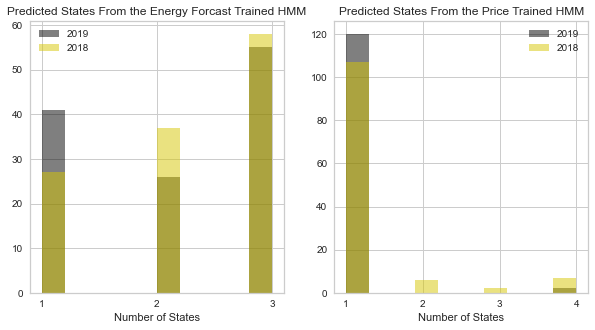

In [543]:
"""plt.hist(pred_states_2019_norm_4class_load_hmm, label = '2019')
plt.hist(pred_states_2018_norm_4class_load_hmm, label ='2018')
plt.legend()
plt.xticks(ticks = [0,1,2], labels = [0,1,2])
plt.xlabel('States')

"""
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (10,5))


ax1.hist(pred_states_2019_norm_4class_load_hmm, color = 'black', label = '2019', alpha = 0.5)
ax1.hist(pred_states_2018_norm_4class_load_hmm, color = 'y',label ='2018', alpha = 0.5)
ax1.set_title('Predicted States From the Energy Forcast Trained HMM')
ax1.set_xlabel('Number of States')
ax1.set_xticks(ticks = [0,1,2])
ax1.set_xticklabels(labels = [1,2,3])
ax1.legend()

ax2.hist(pred_states_2019_norm_4class_lmp_hmm,  color = 'black',label = '2019', alpha = 0.5)
ax2.hist(pred_states_2018_norm_4class_lmp_hmm, color = 'y',label ='2018', alpha = 0.5)
ax2.set_title('Predicted States From the Price Trained HMM')
ax2.set_xlabel('Number of States')
ax2.set_xticks(ticks = [0,1,2,3])
ax2.set_xticklabels(labels = [1,2,3,4])
ax2.legend()

In [545]:
### converting them back to numpy arrays for OLS and BLR
"""2018"""
###LMP FIRST### LMP HMM
arrays_2018_lmp_4class_lmp_hmm = [df_2018_lmp_6pm_4class_1_lmp_hmm.to_numpy(),
                         df_2018_lmp_6pm_4class_2_lmp_hmm.to_numpy(),
                         df_2018_lmp_6pm_4class_3_lmp_hmm.to_numpy(), 
                         df_2018_lmp_6pm_4class_4_lmp_hmm.to_numpy()]


### LOAD ###
arrays_2018_load_4class_lmp_hmm = [df_2018_load_6pm_4class_1_lmp_hmm.to_numpy(),
                         df_2018_load_6pm_4class_2_lmp_hmm.to_numpy(),
                         df_2018_load_6pm_4class_3_lmp_hmm.to_numpy(), 
                         df_2018_load_6pm_4class_4_lmp_hmm.to_numpy()]

"""2019"""
###LMP FIRST###
arrays_2019_lmp_4class_lmp_hmm = [df_2019_lmp_6pm_4class_1_lmp_hmm.to_numpy(),
                         df_2019_lmp_6pm_4class_2_lmp_hmm.to_numpy(),
                         df_2019_lmp_6pm_4class_3_lmp_hmm.to_numpy(), 
                         df_2019_lmp_6pm_4class_4_lmp_hmm.to_numpy()]


### LOAD ###
arrays_2019_load_4class_lmp_hmm = [df_2019_load_6pm_4class_1_lmp_hmm.to_numpy(),
                         df_2019_load_6pm_4class_2_lmp_hmm.to_numpy(),
                         df_2019_load_6pm_4class_3_lmp_hmm.to_numpy(), 
                         df_2019_load_6pm_4class_4_lmp_hmm.to_numpy()]

"""


NOW DOING IT FOR THE LOAD TRAINED HMM

"""


### converting them back to numpy arrays for OLS and BLR
"""2018"""
###LMP FIRST### load HMM
arrays_2018_lmp_4class_load_hmm = [df_2018_lmp_6pm_4class_1_load_hmm.to_numpy(),
                         df_2018_lmp_6pm_4class_2_load_hmm.to_numpy(),
                         df_2018_lmp_6pm_4class_3_load_hmm.to_numpy()]


### LOAD ###
arrays_2018_load_4class_load_hmm = [df_2018_load_6pm_4class_1_load_hmm.to_numpy(),
                         df_2018_load_6pm_4class_2_load_hmm.to_numpy(),
                         df_2018_load_6pm_4class_3_load_hmm.to_numpy()]



"""2019"""
###LMP FIRST###
arrays_2019_lmp_4class_load_hmm = [df_2019_lmp_6pm_4class_1_load_hmm.to_numpy(),
                         df_2019_lmp_6pm_4class_2_load_hmm.to_numpy(),
                         df_2019_lmp_6pm_4class_3_load_hmm.to_numpy()]


### LOAD ###
arrays_2019_load_4class_load_hmm = [df_2019_load_6pm_4class_1_load_hmm.to_numpy(),
                         df_2019_load_6pm_4class_2_load_hmm.to_numpy(),
                         df_2019_load_6pm_4class_3_load_hmm.to_numpy()]



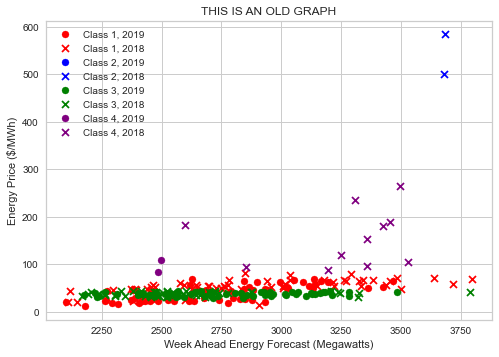

In [550]:
###visualiing the classes OLD OLD OLD OLD OLD

#OLD OLD OLD OLD OLD
#OLD OLD OLD OLD OLD

states = [0,1,2,3]
colors = ['red', 'blue','green', 'purple']
markers = ['o', 'x', '*', '+']
labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4']

for i in range(4):
    q = states[i]
    plt.scatter(arrays_2019_load_4class[q][:,1].reshape(-1, 1), arrays_2019_lmp_4class[q][:,1].reshape(-1, 1),
                color=colors[i], marker= 'o', label = labels[i] +', 2019')
    plt.scatter(arrays_2018_load_4class[q][:,1].reshape(-1, 1), arrays_2018_lmp_4class[q][:,1].reshape(-1, 1),
                color=colors[i], marker= 'x', label = labels[i] +', 2018')
    

#plt.scatter(arrays_2018_load_4class[1][:,1].reshape(-1, 1), arrays_2018_lmp_4class[1][:,1].reshape(-1, 1),
              #  color='blue', marker= 'x', label = '2018')
    
    
plt.xlabel('Week Ahead Energy Forecast (Megawatts)')
plt.ylabel('Energy Price ($/MWh)')
plt.title('THIS IS AN OLD GRAPH')
plt.legend(loc = 'upper left')
plt.show()


#OLD OLD OLD OLD OLD#OLD OLD OLD OLD OLD

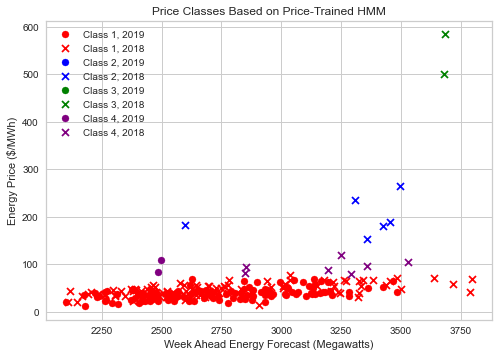

In [554]:
states = [0,1,2,3]
colors = ['red', 'blue','green', 'purple']
markers = ['o', 'x', '*', '+']
labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4']

for i in range(4):
    q = states[i]
    plt.scatter(arrays_2019_load_4class_lmp_hmm[q][:,1].reshape(-1, 1), 
                arrays_2019_lmp_4class_lmp_hmm[q][:,1].reshape(-1, 1),
                color=colors[i], marker= 'o', label = labels[i] +', 2019')
    plt.scatter(arrays_2018_load_4class_lmp_hmm[q][:,1].reshape(-1, 1), 
                arrays_2018_lmp_4class_lmp_hmm[q][:,1].reshape(-1, 1),
                color=colors[i], marker= 'x', label = labels[i] +', 2018')
    

#plt.scatter(arrays_2018_load_4class[1][:,1].reshape(-1, 1), arrays_2018_lmp_4class[1][:,1].reshape(-1, 1),
              #  color='blue', marker= 'x', label = '2018')
    
    
plt.xlabel('Week Ahead Energy Forecast (Megawatts)')
plt.ylabel('Energy Price ($/MWh)')
plt.title('Price Classes Based on Price-Trained HMM')
plt.legend(loc = 'upper left')
plt.show()


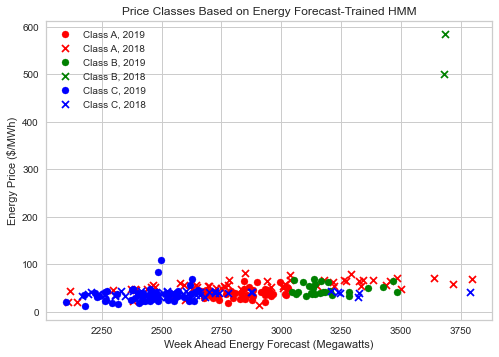

In [660]:
states = [0,1,2]
colors = ['red', 'green','blue', 'purple']
markers = ['o', 'x', '*', '+']
labels = ['Class A', 'Class B', 'Class C']

for i in range(3):
    q = states[i]
    plt.scatter(arrays_2019_load_4class_load_hmm[q][:,1].reshape(-1, 1), 
                arrays_2019_lmp_4class_load_hmm[q][:,1].reshape(-1, 1),
                color=colors[i], marker= 'o', label = labels[i] +', 2019')
    plt.scatter(arrays_2018_load_4class_load_hmm[q][:,1].reshape(-1, 1), 
                arrays_2018_lmp_4class_load_hmm[q][:,1].reshape(-1, 1),
                color=colors[i], marker= 'x', label = labels[i] +', 2018')
    

#plt.scatter(arrays_2018_load_4class[1][:,1].reshape(-1, 1), arrays_2018_lmp_4class[1][:,1].reshape(-1, 1),
              #  color='blue', marker= 'x', label = '2018')
    
    
plt.xlabel('Week Ahead Energy Forecast (Megawatts)')
plt.ylabel('Energy Price ($/MWh)')
plt.title('Price Classes Based on Energy Forecast-Trained HMM')
plt.legend(loc = 'upper left')
plt.show()


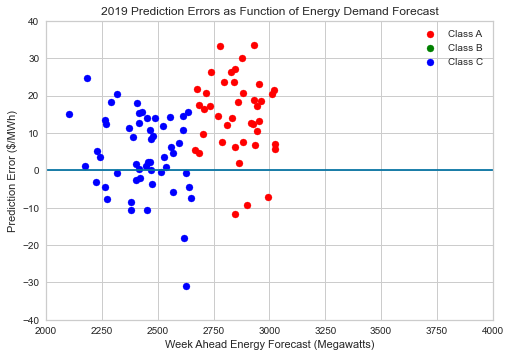

In [573]:
####normal OLS by subclass###
states = [0,1,2]
colors = ['red', 'green','blue']
markers = ['o', 'x', '*', "+"]
labels = ['Class A', 'Class B' , 'Class C']

errors = []
for i in range(3):
    q = states[i]
    num_in_state = np.shape(arrays_2019_load_4class_load_hmm[q])[0]
    if num_in_state ==0:
        pass
    else:
        class_model = LinearRegression(fit_intercept=True)
        class_model.fit(arrays_2018_load_4class_load_hmm[q][:,1].reshape(-1, 1), 
                        arrays_2018_lmp_4class_load_hmm[q][:,1].reshape(-1, 1))

        lmp_pred_2019_6pm = class_model.predict(arrays_2019_load_4class_load_hmm[q][:,1].reshape(-1, 1))

        errors_of_class = lmp_pred_2019_6pm - arrays_2019_lmp_4class_load_hmm[q][:,1].reshape(-1, 1)
        errors.append(errors_of_class)
  
        plt.scatter(arrays_2019_load_4class_load_hmm[q][:,1].reshape(-1, 1), errors_of_class, 
                    color=colors[i], marker= 'o', label = labels[q])


plt.legend()
plt.xlabel('Week Ahead Energy Forecast (Megawatts)')
plt.ylabel('Prediction Error ($/MWh)')
plt.ylim(-40,40)
plt.xlim(2000,4000)
plt.hlines(y=0, xmin = 2000,xmax = 4000)
plt.title('2019 Prediction Errors as Function of Energy Demand Forecast')
plt.show()

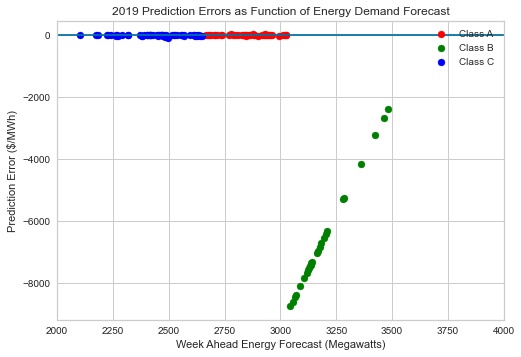

In [574]:
####normal OLS by subclass###
states = [0,1,2]
colors = ['red', 'green','blue']
markers = ['o', 'x', '*', "+"]
labels = ['Class A', 'Class B' , 'Class C']

errors = []
for i in range(3):
    q = states[i]
    num_in_state = np.shape(arrays_2019_load_4class_load_hmm[q])[0]
    if num_in_state ==0:
        pass
    else:
        class_model = LinearRegression(fit_intercept=True)
        class_model.fit(arrays_2018_load_4class_load_hmm[q][:,1].reshape(-1, 1), 
                        arrays_2018_lmp_4class_load_hmm[q][:,1].reshape(-1, 1))

        lmp_pred_2019_6pm = class_model.predict(arrays_2019_load_4class_load_hmm[q][:,1].reshape(-1, 1))

        errors_of_class = lmp_pred_2019_6pm - arrays_2019_lmp_4class_load_hmm[q][:,1].reshape(-1, 1)
        errors.append(errors_of_class)
  
        plt.scatter(arrays_2019_load_4class_load_hmm[q][:,1].reshape(-1, 1), errors_of_class, 
                    color=colors[i], marker= 'o', label = labels[q])


plt.legend()
plt.xlabel('Week Ahead Energy Forecast (Megawatts)')
plt.ylabel('Prediction Error ($/MWh)')
#plt.ylim(-40,40)
plt.xlim(2000,4000)
plt.hlines(y=0, xmin = 2000,xmax = 4000)
plt.title('2019 Prediction Errors as Function of Energy Demand Forecast')
plt.show()

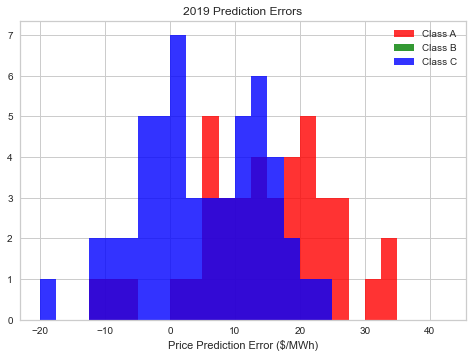

In [563]:
labels = ['Class A','Class B', 'Class C']
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.hist(errors[i], color = colors[i], alpha = 0.8,bins = np.arange(-20,45,2.5), label = labels[i] )
plt.legend()
plt.title('2019 Prediction Errors')
plt.xlabel('Price Prediction Error ($/MWh)')
plt.show()   

#plt.hist(errors[0])

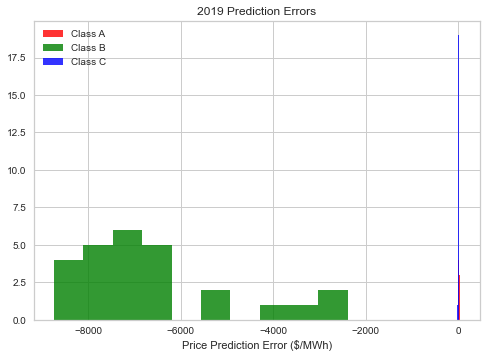

In [572]:
labels = ['Class A','Class B', 'Class C']
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.hist(errors[i], color = colors[i], alpha = 0.8, label = labels[i] )
plt.legend()
plt.title('2019 Prediction Errors')
plt.xlabel('Price Prediction Error ($/MWh)')
plt.show()   

#plt.hist(errors[0])

the predictd mean for 2019 is : 50.48
the predictd mean for 2018 is : 53.98


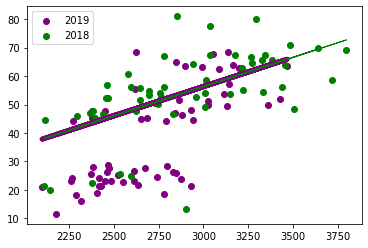

In [148]:

"""# The coefficients
print('Coefficients: \n', basic_model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(array_2019_6pm_lmp, lmp_pred_2019_6pm))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(array_2019_6pm_lmp, lmp_pred_2019_6pm))"""

"""# Plot outputs
plt.scatter(df_2018_load_6pm_4class_1.to_numpy(), df_2018_lmp_6pm_4class_1.to_numpy(),  color='black')
plt.plot(df_2018_load_6pm_4class_1.to_numpy(), lmp_pred_2019_6pm__, color='blue', linewidth=3)


plt.xlabel('Week Ahead Energy Forecast (Megawatts)')
plt.ylabel('Energy Price ($/MWh)')
plt.title('TEST')
plt.show()"""
"""
plt.scatter(arrays_2019_load_4class[0][:,1].reshape(-1, 1), arrays_2019_lmp_4class[0][:,1].reshape(-1, 1),
                    color='red', label = "1")
plt.scatter(arrays_2019_load_4class[1][:,1].reshape(-1, 1), arrays_2019_lmp_4class[1][:,1].reshape(-1, 1),
                    color='blue', label = "2")
plt.scatter(arrays_2019_load_4class[2][:,1].reshape(-1, 1), arrays_2019_lmp_4class[2][:,1].reshape(-1, 1),
                    color='green', label = "3")"""

potato = LinearRegression(fit_intercept=True)
potato.fit(arrays_2018_load_4class[3][:,1].reshape(-1, 1), arrays_2018_lmp_4class[3][:,1].reshape(-1, 1))
#r_sq = basic_model.score(array_2018_6pm_load, array_2018_6pm_lmp)

lmp_pred_2019_6pm_potato = potato.predict(arrays_2019_load_4class[3][:,1].reshape(-1, 1))
lmp_pred_2018_6pm_potato = potato.predict(arrays_2018_load_4class[3][:,1].reshape(-1, 1))

print('the predictd mean for 2019 is : %.2f'
      % np.mean(lmp_pred_2019_6pm_potato))

print('the predictd mean for 2018 is : %.2f'
      % np.mean(lmp_pred_2018_6pm_potato))

plt.scatter(arrays_2019_load_4class[3][:,1].reshape(-1, 1), arrays_2019_lmp_4class[3][:,1].reshape(-1, 1),
                    color='purple', label = "2019 class 4")
plt.plot(arrays_2019_load_4class[3][:,1].reshape(-1, 1), lmp_pred_2019_6pm_potato, color='purple', linewidth=5)

plt.scatter(arrays_2018_load_4class[3][:,1].reshape(-1, 1), arrays_2018_lmp_4class[3][:,1].reshape(-1, 1),
                    color='green', label = "2018 class 4")
plt.plot(arrays_2018_load_4class[3][:,1].reshape(-1, 1), lmp_pred_2018_6pm_potato, color='green', linewidth=1)
plt.legend()

the predictd mean for 2019 class 1 is : 50.48
the predictd mean for 2018 class 1 is : 37.41


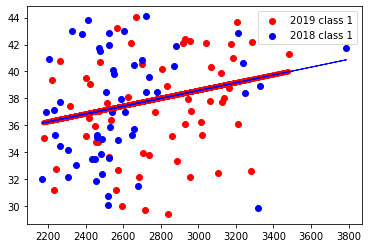

In [157]:
potato1 = LinearRegression(fit_intercept=True)
potato1.fit(arrays_2018_load_4class[0][:,1].reshape(-1, 1), arrays_2018_lmp_4class[0][:,1].reshape(-1, 1))
#r_sq = basic_model.score(array_2018_6pm_load, array_2018_6pm_lmp)

lmp_pred_2019_6pm_potato1 = potato1.predict(arrays_2019_load_4class[0][:,1].reshape(-1, 1))
lmp_pred_2018_6pm_potato1 = potato1.predict(arrays_2018_load_4class[0][:,1].reshape(-1, 1))

print('the predictd mean for 2019 class 1 is : %.2f'
      % np.mean(lmp_pred_2019_6pm_potato))

print('the predictd mean for 2018 class 1 is : %.2f'
      % np.mean(lmp_pred_2018_6pm_potato1))

plt.scatter(arrays_2019_load_4class[0][:,1].reshape(-1, 1), arrays_2019_lmp_4class[0][:,1].reshape(-1, 1),
                    color='red', label = "2019 class 1")
plt.plot(arrays_2019_load_4class[0][:,1].reshape(-1, 1), lmp_pred_2019_6pm_potato1, color='red', linewidth=5)

plt.scatter(arrays_2018_load_4class[0][:,1].reshape(-1, 1), arrays_2018_lmp_4class[0][:,1].reshape(-1, 1),
                    color='blue', label = "2018 class 1")
plt.plot(arrays_2018_load_4class[0][:,1].reshape(-1, 1), lmp_pred_2018_6pm_potato1, color='blue', linewidth=1)
plt.legend()

In [73]:
"""
Here I have converted a column vector of sequential hours of 2018 data to a matrix of 
dimension (number of days) x (24 hours) for temperature
"""

temp_2018_df = df_2018['SF Temp (F)']
temp_2018_arr = to_matrix(temp_2018_df)


In [76]:
"""
Here I have converted a column vector of sequential hours of 2018 data to a matrix of 
dimension (number of days) x (24 hours) for 7 DA Energy Forecast
"""

load_2018_df = df_2018['7DA Load Forecast']
load_2018_arr = to_matrix(load_2018_df)

In [82]:
#testing combining the load and temperature matrices together

load_temp = np.dstack((load_2018_arr,temp_2018_arr))
print(np.shape(load_temp))
print(np.shape(load_2018_arr))

(122, 24, 2)
(122, 24)


In [57]:
## Code block that converts the column vector hours into a matrix of hours and days

def to_matrix(data):
    data = data.to_numpy()
    total_hours = np.shape(data)[0]
    days = np.int(total_hours/24)
    temp_array = np.zeros((days, 24))
    temp_array[0,:] = data[:24]
    
    for i in range(1, days):

        temp_array[i,:] = data[24*i:24+24*i]
    return temp_array

"""To not delete this"""